In [1]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")

Seaborn kütüphanesinde bulunan 'tips' veri seti, restoranlarda bahşiş verme davranışı ile ilgili verileri içerir. Bu veri seti, farklı öğünlerde, farklı günlerde ve farklı cinsiyet/kişi sayıları için alınan bahşiş miktarlarını içermektedir. Aşağıda, bu veri setindeki sütunların açıklamaları bulunmaktadır:

1. **total_bill**: Toplam hesap miktarı (ABD doları cinsinden).
2. **tip**: Bahşiş miktarı (ABD doları cinsinden).
3. **sex**: Hesabı ödeyen kişinin cinsiyeti (Erkek/Kadın).
4. **smoker**: Grubun içinde sigara içen olup olmadığı (Evet/Hayır).
5. **day**: Hesabın ödendiği gün (Perşembe, Cuma, Cumartesi, Pazar).
6. **time**: Hesabın ödendiği öğün zamanı (Öğle yemeği/Akşam yemeği).
7. **size**: Grubun kişi sayısı.

Bu veri seti, bahşiş verme alışkanlıklarını çeşitli açılardan incelemek için kullanılabilir.

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
tips.shape

(244, 7)

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Describe Sonuçlarına göre
* Veri kümesinde 244 gözlem bulunmaktadır. Bahşiş miktarının ortalaması 2.99 dolar, standart sapması ise 1.38 dolar'dır. Bahşiş miktarının en düşük değeri 0 dolar, en yüksek değeri ise 10 dolar'dır.

* Ortalama bahşiş miktarının 2.99 dolar olması, restoranda alınan bahşişlerin genellikle hesap tutarının %15-%20'si civarında olduğunu göstermektedir. Standart sapmanın 1.38 dolar olması, bahşiş miktarlarının oldukça değişken olduğunu göstermektedir. Bazı durumlarda, bahşiş miktarı ortalamanın %200'den fazla artabilir veya azalabilir.

* Bahşiş miktarının en düşük değerinin 1 dolar olması, yüksek değerinin 10 dolar olması ise, bazı durumlarda bahşiş miktarının oldukça yüksek olabileceğini göstermektedir.

In [10]:
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

Seaborn kütüphanesi, veri görselleştirme için çeşitli türde grafikler sunar, ancak bu grafikler genellikle üç ana kategoriye ayrılır: Dağılım (Distribution), Kategorik (Categorical) ve Karşılaştırma (Comparison-Relational).  ancak bazı açıklamalar yapmakta fayda var:

**Dağılım (Distribution) Plotları**: Bu tür plotlar, veri setindeki değişkenlerin dağılımını göstermek için kullanılır. Örnekler arasında distplot, histplot, kdeplot, rugplot gibi grafikler bulunur.

**Kategorik (Categorical) Plotları**: Bu plotlar, kategorik değişkenlerin analizi ve görselleştirilmesi için kullanılır. barplot, boxplot, violinplot, countplot gibi grafikler bu kategoriye dahildir.

**Karşılaştırma (Relational) Plotları**: Bu tür plotlar, genellikle iki veya daha fazla sayısal değişken arasındaki ilişkiyi göstermek için kullanılır. scatterplot, lineplot gibi grafikler bu kategoriye aittir.

Bunun yanı sıra, Seaborn ayrıca ızgara tabanlı plotlar ve çok değişkenli analiz için plotlar gibi daha karmaşık görselleştirme türlerini de destekler. Bu nedenle, Seaborn'un sunduğu görselleştirme çeşitliliği üç ana kategoriyle sınırlı değildir.


## Scatter Plot

---

### Kod Açıklaması

### `sns.scatterplot(data = tips, x = "total_bill", y = "tip");`

Bu satırda, Seaborn kütüphanesinin `scatterplot` fonksiyonu kullanılarak bir saçılma grafiği çizilmektedir. Fonksiyonun parametreleri şunlardır:

- **data = tips**: Grafik için kullanılacak veri kaynağı. Burada `tips` adlı bir DataFrame kullanılıyor.
- **x = "total_bill"**: X ekseni için kullanılacak olan sütun, toplam fatura (total bill) olarak belirlenmiş.
- **y = "tip"**: Y ekseni için kullanılacak olan sütun, bahşiş (tip) olarak belirlenmiş.

Bu kodda, `hue` veya `style` gibi ek parametreler belirtilmemiş, bu nedenle basit bir saçılma grafiği çizilecektir.

### Output Açıklaması

Bu kod bloğu çalıştırıldığında, "total_bill" ve "tip" sütunları arasındaki ilişkiyi gösteren bir saçılma grafiği oluşturulur. Grafiğin X ekseni 'total_bill' ve Y ekseni 'tip' olarak belirlenir. Her bir nokta, bir restoran müşterisini temsil eder.

Bu grafik, toplam fatura miktarı ile bahşiş miktarı arasında nasıl bir ilişki olduğunu gözlemlememizi sağlar. Genel olarak, fatura miktarı arttıkça bahşiş miktarının da arttığı görülebilir, fakat her zaman böyle olmayabilir. Grafik, yalnızca genel bir eğilimi gösterir ve istisnalar da olabileceğini unutmamak gerekir.

---


In [1]:
sns.scatterplot(data = tips, x = "total_bill", y = "tip")
plt.show()

NameError: name 'sns' is not defined

## Reg Plot
### Kod Açıklaması

### `sns.regplot(data = tips, x= "total_bill", y = "tip");`

Bu satırda, Seaborn kütüphanesinin `regplot` fonksiyonu kullanılarak bir regresyon grafiği çizilir. Fonksiyonun parametreleri şunlardır:

- `data = tips`: Grafik için kullanılacak veri kaynağı. Burada `tips` adlı bir DataFrame kullanılıyor.
- `x = "total_bill"`: X ekseni için kullanılacak olan sütun, toplam hesap (total bill) olarak belirlenmiş.
- `y = "tip"`: Y ekseni için kullanılacak olan sütun, bahşiş (tip) olarak belirlenmiş.

Bu kodda `x_estimator` parametresi belirtilmemiş, yani her bir x değeri için yatayda bir ortalaması çıkarılmayacak.

### Output Açıklaması

Bu kod bloğu çalıştırıldığında, 'total_bill' ve 'tip' sütunları arasındaki ilişkiyi gösteren bir regresyon grafiği oluşturulur. Grafiğin X ekseni 'total_bill' ve Y ekseni 'tip' olarak belirlenir. Noktalar, her bir gözlemi (örneği) temsil eder ve çizilen çizgi, bu noktalar arasında en uygun fit (uyum) sağlayan doğrusal bir çizgiyi temsil eder.

Bu grafik, 'total_bill' ve 'tip' arasındaki ilişkinin doğrusal olup olmadığını gözlemlemek için kullanılır.

### Gölge Genişliği Hakkında Ek Bilgi

Eğer çizginin etrafındaki gölge (güven aralığı) dar ise, bu, modelin tahminlerinin daha kesin olduğunu ve verilere daha iyi uyduğunu gösterir. Yani, yüksek olasılıkla, yeni bir gözlem (örneğin, yeni bir 'total_bill' değeri) geldiğinde, modelimizin 'tip' tahmini oldukça güvenilirdir.

Eğer gölge geniş ise, bu, modelin tahminlerinin daha az kesin olduğunu ve verilere daha az iyi uyduğunu gösterir. Yani, yeni bir gözlem geldiğinde, modelimizin 'tip' tahmini daha az güvenilir olabilir.

Gölge genişliği, modelin ne kadar iyi calibre edildiğinin ve verilerin ne kadar tutarlı olduğunun bir göstergesi olarak kabul edilir.

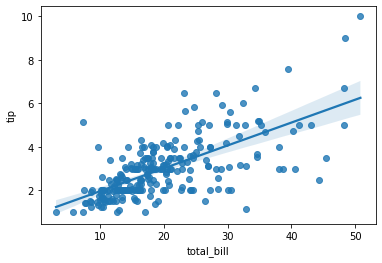

In [12]:
sns.regplot(data = tips, x = "total_bill", y = "tip");

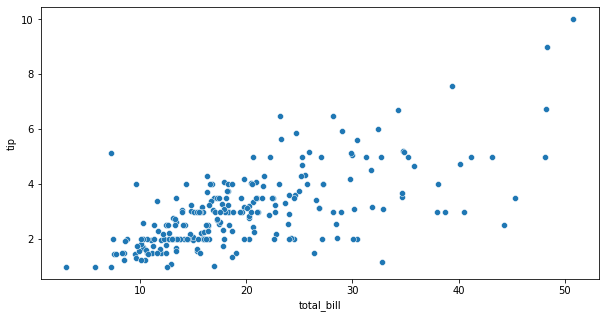

In [13]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = tips["total_bill"], y = tips["tip"]);

## Hue

### Kod Açıklaması

### `sns.scatterplot(data = tips, x = "total_bill", y = "tip", hue = "smoker");`

Bu kodda, Seaborn kütüphanesinin `scatterplot` fonksiyonu kullanılarak bir saçılım grafiği (scatter plot) çizilir. Fonksiyonun parametreleri şunlardır:

- `data = tips`: Grafik için kullanılacak veri seti. Burada `tips` adında bir DataFrame kullanılıyor.
- `x = "total_bill"`: X ekseni için kullanılacak olan sütun. Toplam hesap (total bill) olarak belirlenmiş.
- `y = "tip"`: Y ekseni için kullanılacak olan sütun. Bahşiş (tip) olarak belirlenmiş.
- `hue = "smoker"`: Her bir noktanın rengini, "smoker" sütununun kategorik değerlerine göre belirler.

### Output Açıklaması

Bu kod bloğu çalıştırıldığında, 'total_bill' ve 'tip' sütunları arasındaki ilişkiyi gösteren bir saçılım grafiği oluşturulur. Grafiğin X ekseni 'total_bill' ve Y ekseni 'tip' olarak belirlenir. Her bir nokta, bir gözlemi (örneği) temsil eder. Ayrıca, noktaların renkleri, kişinin sigara içip içmediğini ('smoker') gösterir. Bu şekilde, faturaların toplamı ile bahşişler arasındaki ilişkinin, sigara içme durumuna göre nasıl değiştiğini gözlemlemek mümkündür.

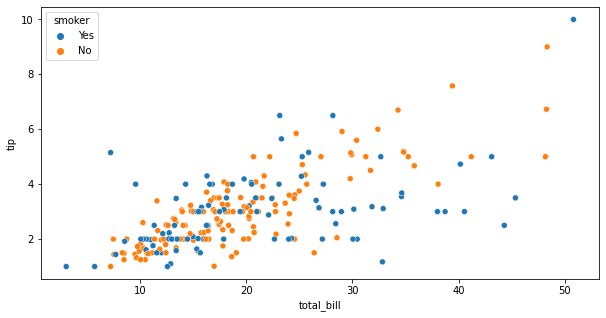

In [14]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", y = "tip", data = tips, hue = "smoker");

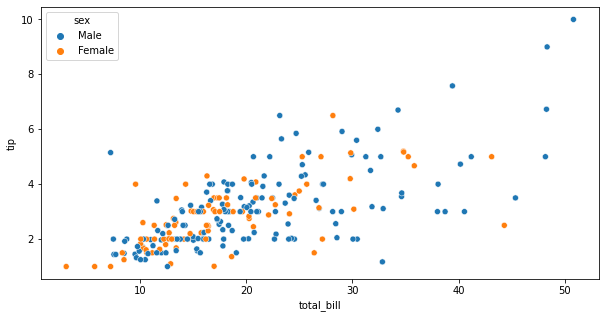

In [15]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", y = "tip", data = tips, hue = "sex");

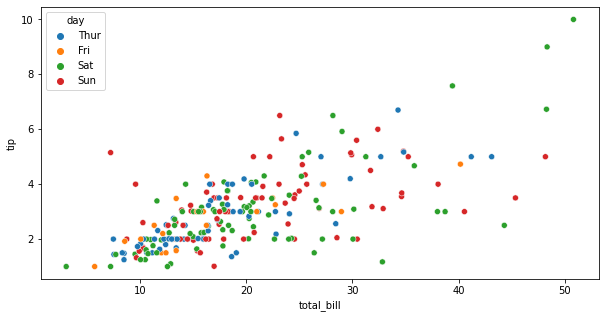

In [16]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", y = "tip", data = tips, hue = "day");

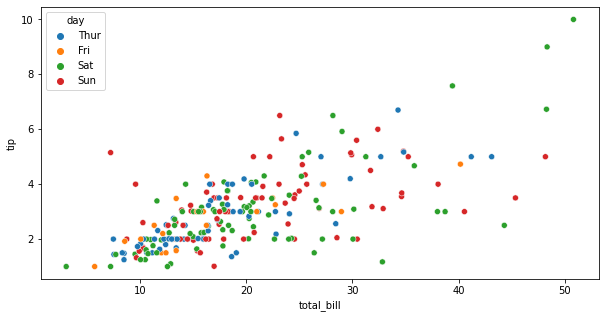

In [17]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", hue = "day");

## Style

### Kod Açıklaması

### `sns.scatterplot(data = tips, x = "total_bill", y = "tip", style = "sex");`

Bu kodda, Seaborn kütüphanesinin `scatterplot` fonksiyonu kullanılarak bir saçılım grafiği çizilmiştir. Fonksiyonun parametreleri şunlardır:

- `data = tips`: Grafik için kullanılacak veri seti. Burada `tips` adında bir DataFrame kullanılıyor.
- `x = "total_bill"`: X ekseni için kullanılacak olan sütun. Toplam hesap (total bill) olarak belirlenmiş.
- `y = "tip"`: Y ekseni için kullanılacak olan sütun. Bahşiş (tip) olarak belirlenmiş.
- `style = "sex"`: Noktaların şeklini, "sex" sütununun kategorik değerlerine göre belirler.

### Output Açıklaması

Bu kod bloğu çalıştırıldığında, 'total_bill' ve 'tip' sütunları arasındaki ilişkiyi gösteren bir saçılım grafiği oluşturulur. Grafiğin X ekseni 'total_bill' ve Y ekseni 'tip' olarak belirlenir. Her bir nokta, bir gözlemi (örneği) temsil eder. Noktaların şekli, cinsiyeti ("sex") gösterir, bu da gözlemlerin cinsiyetlere göre farklılıklarını gözlemlememize olanak sağlar.


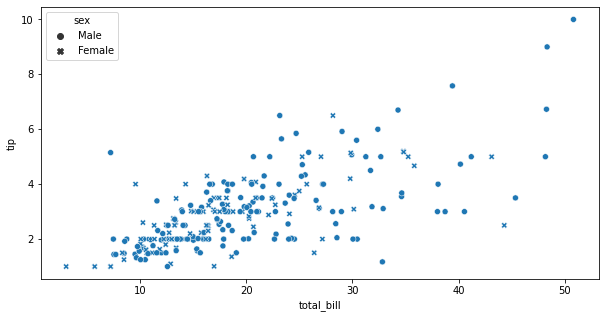

In [18]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", style = "sex");

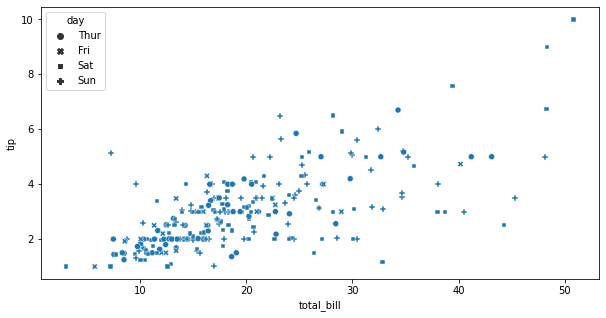

In [19]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", style = "day");

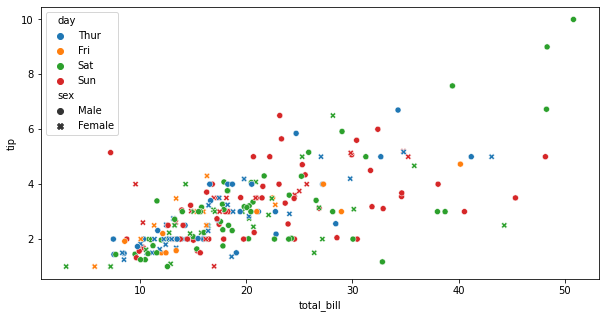

In [20]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", style = "sex", hue = "day");

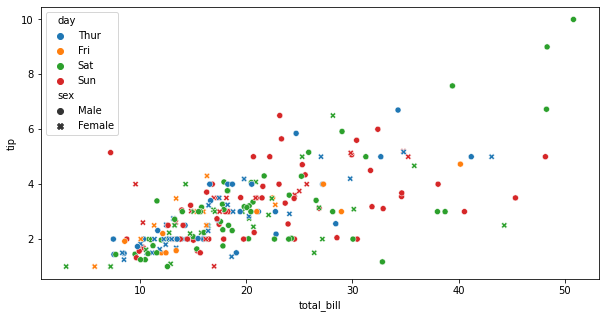

In [21]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = tips["total_bill"], y = tips["tip"], style=tips.sex, hue=tips.day);

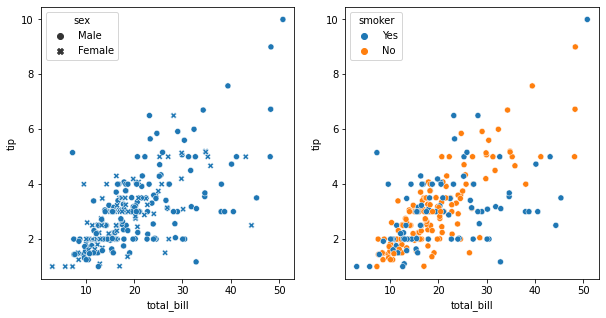

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.scatterplot(x = "total_bill", y = "tip", data = tips, style = "sex", ax = ax[0])
sns.scatterplot(x = "total_bill", y = "tip", data = tips, hue = "smoker", ax = ax[1]);

https://seaborn.pydata.org/tutorial/color_palettes.html #seaborn renk sayfası

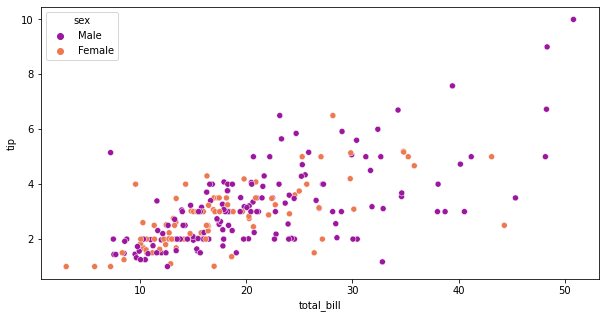

In [23]:
#palette
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", hue = "sex", palette = "plasma");

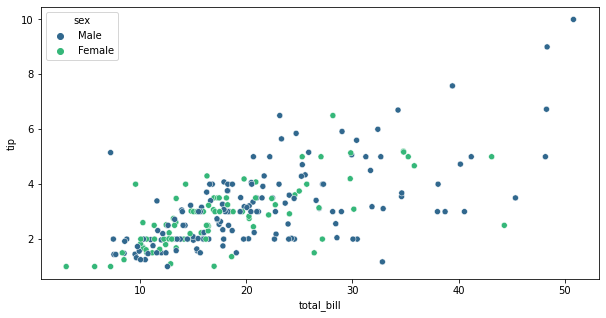

In [24]:
#palette
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", hue = "sex", palette = "viridis");

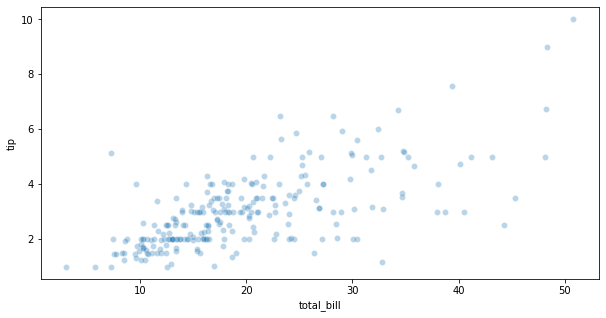

In [25]:
#Yoğunluk-alpha

plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", alpha = 0.3);

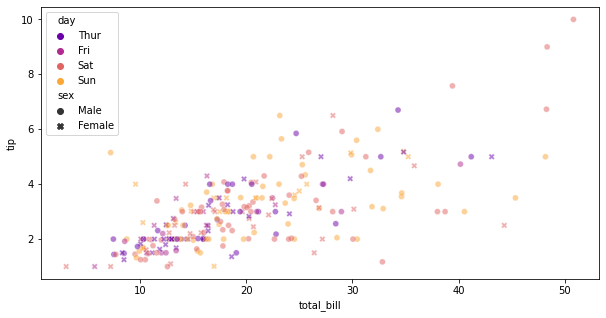

In [26]:
# Yukarıdakilerin tümünü uyguladık.
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", style = "sex", hue = "day", palette = "plasma", alpha = 0.5);

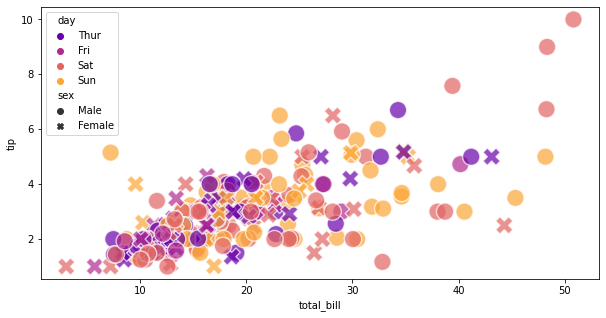

In [27]:
#grafikteki şekillerin boyutu için - S
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", 
                style = "sex", 
                hue = "day", 
                palette = "plasma", 
                alpha = 0.7,
               s = 300);

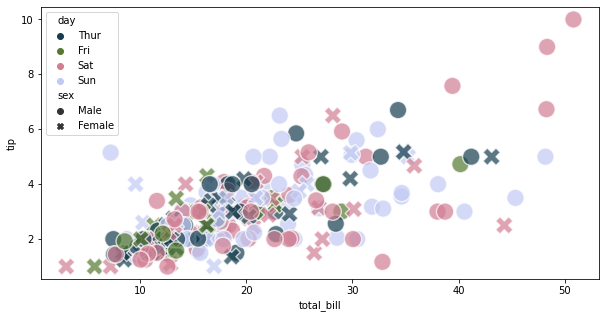

In [28]:
#Yukarıdakilerin tümünü uyguladık.
plt.figure(figsize = (10,5))

sns.scatterplot(x = "total_bill", data = tips, y = "tip", 
                style = "sex", 
                hue = "day", 
                palette = "cubehelix", 
                alpha = 0.7,
                s = 300);

## Distribution Plot

### Kod Açıklaması

### `sns.displot(data = tips, x = "total_bill");`

Bu kodda, Seaborn kütüphanesinin `displot` fonksiyonu kullanılarak bir histogram çizilir. Bu fonksiyon, tek bir değişkenin dağılımını görselleştirmek için kullanılır.  sns.displot() işlevi, veri setinizdeki bir değişkenin dağılımını incelemek için kullanılır. Bu işlev, genellikle histogramlar veya yoğunluk grafiği gibi görsel temsiller oluşturur. Fonksiyonun parametreleri şunlardır:

- `data = tips`: Grafik için kullanılacak veri kaynağı. Burada `tips` adlı bir DataFrame kullanılıyor.
- `x = "total_bill"`: X ekseni için kullanılacak olan sütun, toplam hesap (`total_bill`) olarak belirlenmiş.

### Output Açıklaması

Bu kod bloğu çalıştırıldığında, `total_bill` sütununun dağılımını gösteren bir histogram oluşturulur. Grafiğin X ekseni 'total_bill' olarak belirlenir. Her bir çubuk, 'total_bill' değişkeninin belli bir aralığındaki gözlem sayısını temsil eder. Yüksekliği, o aralıkta kaç gözlem olduğunu gösterir.

Bu grafik, `total_bill` değişkeninin dağılımını anlamak için kullanılır; örneğin, en çok hangi `total_bill` değerlerinin olduğu, dağılımın simetrik olup olmadığı gibi.



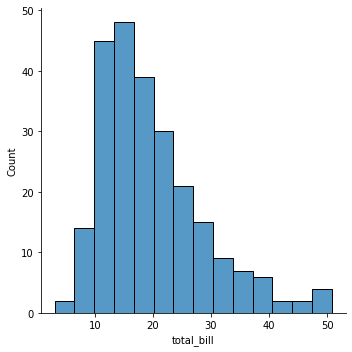

In [29]:
sns.displot(x="total_bill", data = tips);

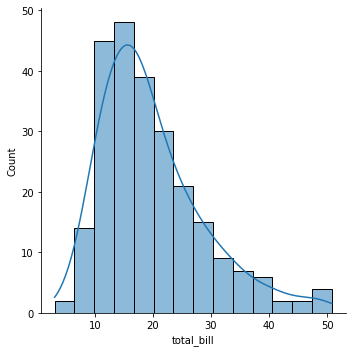

In [30]:
sns.displot(x="total_bill", data = tips, kde = True);

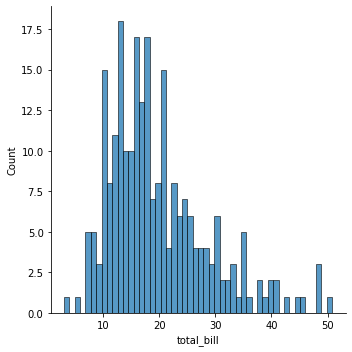

In [31]:
sns.displot(x="total_bill", data = tips, bins = 50);

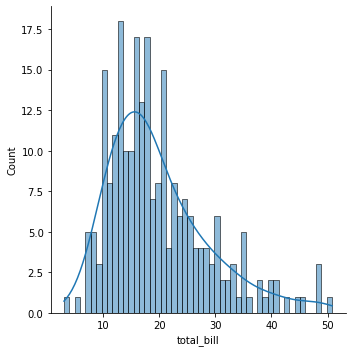

In [32]:
sns.displot(x="total_bill", data = tips, bins = 50, kde=True);

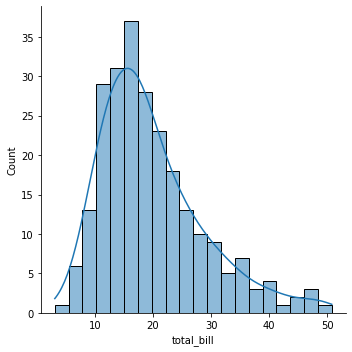

In [33]:
sns.displot(x="total_bill", data = tips, bins = 20, kde=True);

**bins**:

Histogramdaki çubukların sayısını belirler. Daha fazla çubuk, veri dağılımının daha ayrıntılı bir görünümünü sağlar. Daha az çubuk, veri dağılımının daha genel bir görünümünü sağlar. Bu kodda, 50 çubuk kullanılarak veri dağılımı nispeten ayrıntılı bir şekilde gösterilecektir. 

**kde**:

"Kernel Density Estimation" (Çekirdek Yoğunluk Tahmini) anlamına gelir. Veri dağılımının şeklini gösteren düzgün bir eğri çizmek için kullanılır. Bu eğri, histogram çubuklarının üst kenarlarını birleştiren bir çizgi gibi düşünülebilir. Bu kodda, kde = True olarak ayarlandığı için, histograma ek olarak bir KDE eğrisi de çizilecektir.

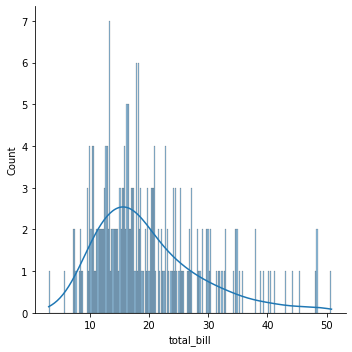

In [34]:
sns.displot(x="total_bill", data = tips, bins = 244, kde=True);

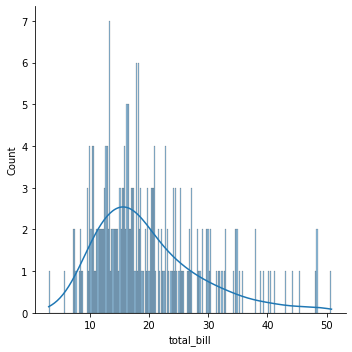

In [35]:
#Ömer Talha Türkmen katkılarıyla
sns.displot(x="total_bill", data=tips, bins=tips.total_bill.count(), kde=True);

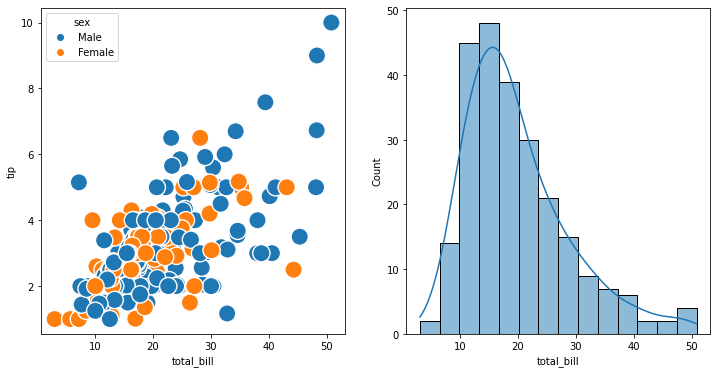

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

sns.scatterplot(x = "total_bill", y = "tip", data = tips, s = 300, hue = "sex", ax=ax[0])
sns.histplot(x = "total_bill", data = tips, kde = True, ax=ax[1])
plt.show()

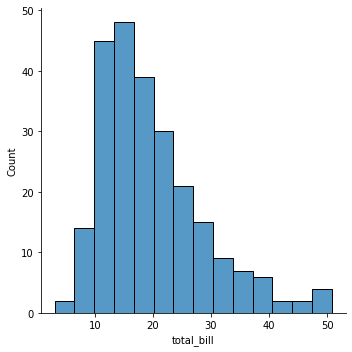

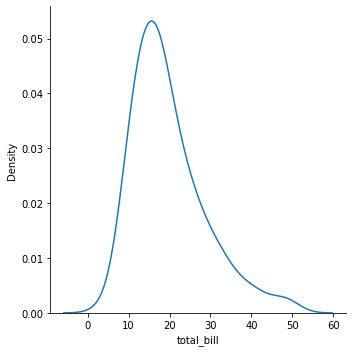

In [37]:
sns.displot(x = "total_bill", data = tips, kind = "hist")
sns.displot(x = "total_bill", data = tips, kind = "kde");

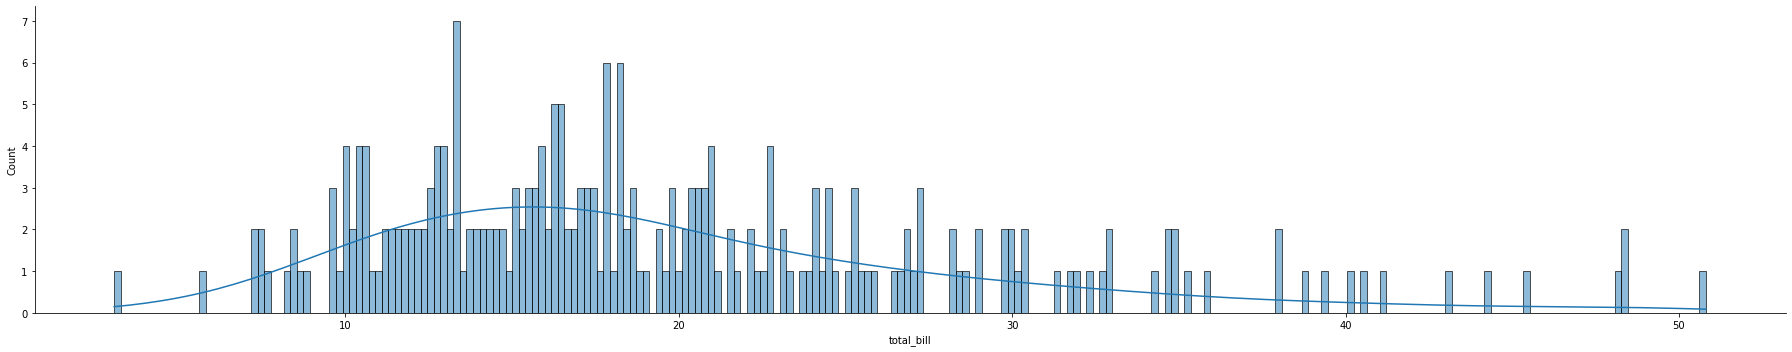

In [38]:
sns.displot(x="total_bill", data = tips, bins = 244, kde=True, aspect = 5);

## Histplot

Seaborn veri görselleştirme kütüphanesi ile bir veri setinin dağılımını göstermek için kullanılır. Bu işlev, bir histogram oluşturarak veri noktalarının belirli aralıklarda nasıl dağıldığını görsel olarak gösterir.

seaborn.histplot() işlevi bazı önemli parametrelere sahiptir ve bu parametreler aracılığıyla histogramın görünümü özelleştirilebilir. İşte bazı temel parametreler:

**data**: Görselleştirilecek veri setini belirtir. 

**x veya y**: Hangi veri değişkeninin histogramının oluşturulacağını belirtir. Eğer sadece x belirtilirse, yatay bir histogram oluşturulur; sadece y belirtilirse, dikey bir histogram oluşturulur

**bins**: Histogramda kullanılacak çubuk sayısını belirtir. 

**kde**: Bu parametre, histogramın üstüne yoğunluk tahmin eğrisi eklenip eklenmeyeceğini belirler. True olarak ayarlanırsa, eğri eklenir.

**color**: Histogramun rengini belirtir.

**label**: Eğri veya histogram için bir etiket belirtir, bu sayede grafikteki bileşenleri açıklamak için kullanılır.

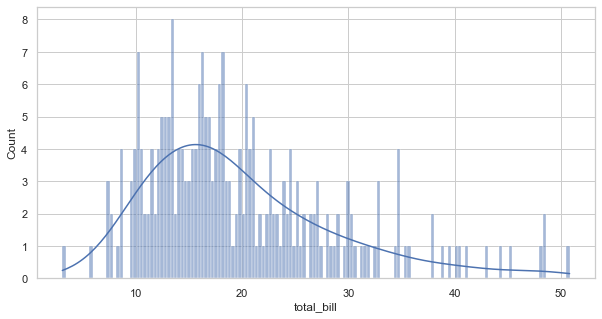

In [174]:
plt.figure(figsize = (10, 5))
sns.histplot(data = tips, x = "total_bill", bins = 150, kde = True);

### Kod Açıklaması

Bu kod parçası, Seaborn kütüphanesini kullanarak iki farklı türde veri görselleştirmesi yapar. Birincil hedef, "total_bill" sütununu bir rugplot ile ve "tip" sütununu bir histplot ile görselleştirmektir.

İlk olarak, plt.subplots(1, 2, figsize=(10, 5)) kodu, iki alt grafik (subplot) içeren bir şekil (figure) oluşturur. İlk alt grafikte "total_bill" sütununu göstereceğiz ve ikinci alt grafikte "tip" sütununu göstereceğiz. fig değişkeni, tüm şekli temsil eder ve ax değişkeni alt grafikleri temsil eder.

İlk alt grafikte sns.rugplot() kullanılır. Bu, verinin dağılımını tek boyutlu bir çizgi olarak gösterir. data=tips ile veriyi belirtiriz, x="total_bill" ile hangi sütunu kullanacağımızı belirtiriz, height=0.8 ile çizginin yüksekliğini ayarlarız ve ax=ax[0] ile bu alt grafiği belirtilen konuma yerleştiririz.

İkinci alt grafikte ise sns.histplot() kullanılır. Bu, verinin histogramını çizer. Yine data=tips ile veriyi belirtiriz, x="tip" ile hangi sütunu kullanacağımızı belirtiriz, kde=True ile çizgiyi (KDE - Kernel Density Estimation) ekleriz ve ax=ax[1] ile bu alt grafiği belirtilen konuma yerleştiririz.

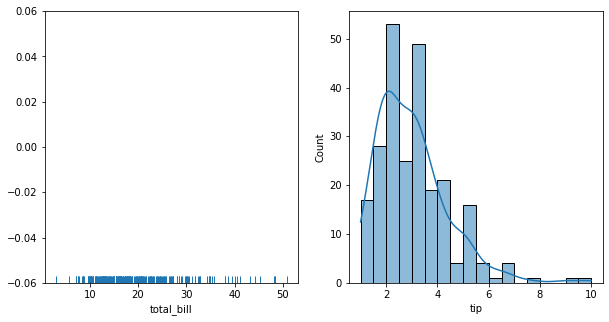

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.rugplot(data=tips, x = "total_bill", ax = ax[0])
sns.histplot(data=tips, x = "tip", kde = True, ax = ax[1]);

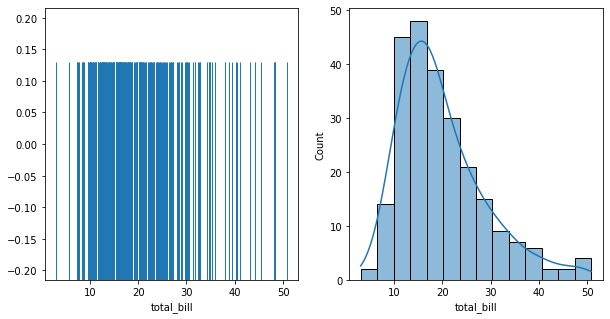

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.rugplot(data=tips, x = "total_bill", height = 0.8, ax = ax[0])
sns.histplot(data=tips, x = "total_bill", kde = True, ax = ax[1]);

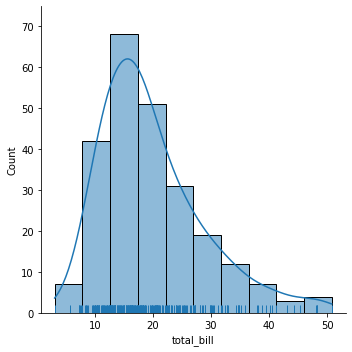

In [41]:
sns.displot(data = tips,
           x = "total_bill",
           bins = 10,
           rug = True,
           kde = True);

### Kod Açıklaması:
sns.set(style="dark"): Bu kod satırı, Seaborn'un stil ayarlarını "dark" olarak ayarlar. Bu, çizimlerin daha karanlık bir arka plan üzerinde görüntülenmesini sağlar ve bir dizi varsayılan renk ve stil ayarını değiştirir.

sns.histplot(data=tips, x="tip", kde=True): Bu kod satırı, "tips" adlı veri kümesindeki "tip" sütununun dağılımını görselleştirir. data=tips ile veriyi belirtiriz, x="tip" ile hangi sütunu kullanacağımızı belirtiriz ve kde=True ile histogramın üstünde sürekli yoğunluk tahmini (KDE çizgisi) ekleriz.

plt.show(): Bu kod satırı, çizimi görüntüler.

* x ekseni: x ekseni "tip" sütunundaki verileri temsil eder. Yani, bu eksende her bir sütun, farklı bahşiş miktarlarını gösterir. Her sütun, belirli bir bahşiş aralığını temsil eder. Örneğin, bir sütun 5 ile 10 dolar arasındaki bahşişleri temsil edebilir.

* y ekseni: y ekseni, belirli bir bahşiş aralığındaki veri noktalarının sayısını temsil eder. Y ekseni boyunca her bir sütunun yüksekliği, bu bahşiş aralığına sahip kaç tane veri noktasının olduğunu gösterir. Yani, her bir sütunun yüksekliği, o bahşiş aralığına ait veri noktalarının sayısını ifade eder.

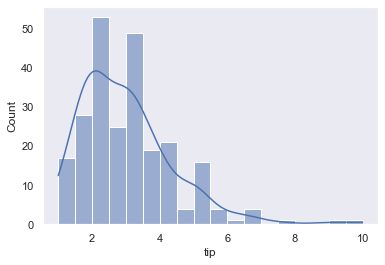

In [42]:
sns.set(style = "dark")

sns.histplot(data = tips, x = "tip", kde = True);

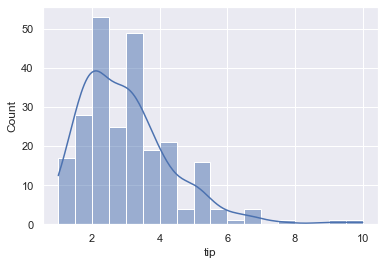

In [43]:
sns.set(style = "darkgrid")

sns.histplot(data = tips, x = "tip", kde = True);

## KDE Plot (Kernel Densty Estimation)

### Data
Antarktika'daki üç farklı penguen türüne (Adelie, Chinstrap ve Gentoo) ait özellikler içerir. Genellikle veri görselleştirme, istatistiksel analiz ve makine öğrenimi uygulamalarında kullanılır.

Veri setinde genellikle şu tür bilgiler bulunur:

**species**: Penguen türü (Adelie, Chinstrap, Gentoo).

**island**: Penguenlerin gözlemlendiği ada (örneğin Biscoe, Dream, Torgersen).

**bill_length_mm**: Penguenlerin gagalarının uzunluğu milimetre cinsinden.

**bill_depth_mm**: Penguenlerin gagalarının derinliği milimetre cinsinden.

**flipper_length_mm**: Penguenlerin yüzgeç uzunlukları milimetre cinsinden.

**body_mass_g**: Penguenlerin vücut ağırlıkları gram cinsinden.

**sex**: Penguenin cinsiyeti (erkek veya dişi).

Bu veri seti, penguenlerin morfolojik ölçümlerini ve türlerini içerir ve bu özellikler arasındaki ilişkileri keşfetmek için kullanılabilir. Örneğin, farklı penguen türlerinin boyutları ve vücut ağırlıkları arasındaki farklar gibi konular bu veri seti ile analiz edilebilir.

In [44]:
penguins = sns.load_dataset("penguins")

In [45]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [46]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Kod Açıklaması
Bu kod parçası, Seaborn kütüphanesini kullanarak "body_mass_g" sütunundaki verilerin yoğunluk tahminini (KDE - Kernel Density Estimation) görselleştirir. body_mass_g (penguenlerin vücut ağırlığı gram cinsinden) değişkeni için KDE grafiği, bu ağırlıkların yoğunluğunu (yani ne kadar sık görüldüğünü) gösterir.

- x ekseni: x ekseni "body_mass_g" sütunundaki verileri temsil eder. Yani, bu eksende her bir çizgi, farklı kuşların vücut kitlelerini gösterir. x ekseni boyunca yer alan değerler, kuşların vücut kitlelerini temsil eder.

- y ekseni: y ekseni, yoğunluk tahminini (KDE) temsil eder. Her bir x değeri için, y ekseni boyunca bir yoğunluk değeri bulunur. Bu değerler, verinin o belirli noktasının yoğunluğunu gösterir.

Eğrinin Yüksekliği (Density): Eğrinin yüksekliği, veri noktalarının yoğunluğunu gösterir. Eğri ne kadar yüksekse, o bölgedeki veri noktaları o kadar yoğundur. Yani, eğer eğri bir ağırlık değeri etrafında yüksekse, bu ağırlığa sahip penguenlerin sayısının daha fazla olduğunu gösterir.

Eğrinin Şekli: Eğrinin genel şekli, veri dağılımının karakteristiğini yansıtır. Örneğin, tek bir zirve (tepe) varsa bu, verilerin bir "normal" dağılıma benzediğini gösterir. Birden fazla zirve varsa, bu farklı alt grupların varlığını işaret edebilir.

Eğrinin Genişliği: Eğri ne kadar genişse, veriler o kadar dağılmıştır. Yani, penguenlerin vücut ağırlıkları arasında büyük farklılıklar varsa, eğri daha geniş olacaktır.

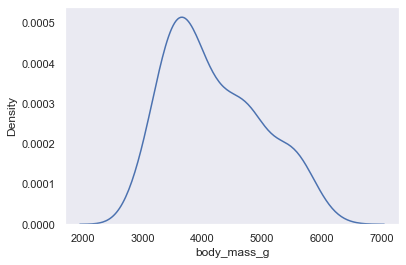

In [47]:
sns.set(style = "dark")
sns.kdeplot(data = penguins, x = "body_mass_g");

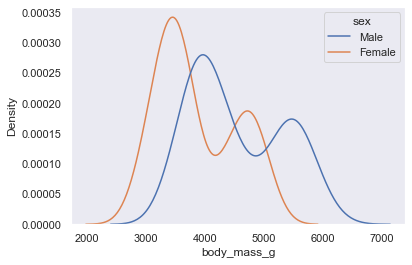

In [48]:
sns.kdeplot(data = penguins, x = "body_mass_g", hue = "sex");

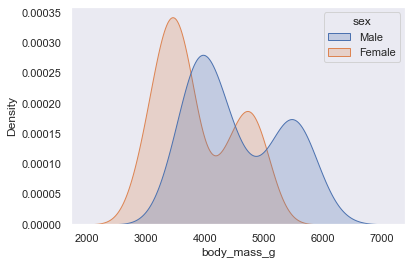

In [49]:
sns.kdeplot(data = penguins, x = "body_mass_g", hue = "sex", shade = True);

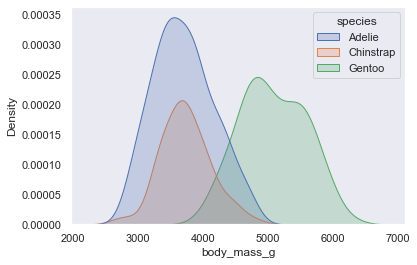

In [50]:
sns.kdeplot(data = penguins, x = "body_mass_g", hue = "species", shade = True);

## 2D kde graph izohips haritası gibi

### Kod açıklaması

Bu kod parçası, Seaborn kütüphanesini kullanarak **tips data setindeki** "total_bill" sütunu ile "tip" sütunu arasındaki ilişkiyi bir KDE (Kernel Density Estimation) çizimi ile görselleştiriyor.
- x ekseni: x ekseni "total_bill" sütunundaki verileri temsil eder. Bu eksende her bir çizgi, farklı yemek hesaplarının toplam tutarlarını temsil eder. Her bir x değeri, bir yemek hesabının toplam tutarını ifade eder.

- y ekseni: y ekseni "tip" sütunundaki verileri temsil eder. Bu eksende her bir çizgi, belirli bir bahşiş miktarını temsil eder. Her bir y değeri, bir bahşiş miktarını ifade eder.

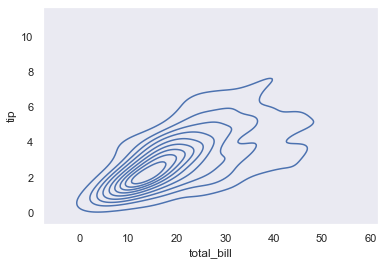

In [51]:
sns.kdeplot(data = tips, x = "total_bill", y = "tip");

### Çıktı Açıklaması:
Bu kodu çalıştırdığınızda, "total_bill" ve "tip" sütunları arasındaki ilişkiyi gösteren bir KDE (Kernel Density Estimation) çizimi elde edersiniz. Her bir çizgi, yemek hesaplarının toplam tutarı (x ekseni) ile bu hesaplara ait bahşiş miktarını (y ekseni) gösterir. Bu çizgi, veri noktalarının yoğunluğunu gösterir ve bu iki değişken arasındaki ilişkiyi incelemenize yardımcı olur.

değişkenleri arasındaki ilişkiyi gösteren bir KDE (Kernel Density Estimate) kontur grafiğidir. Bu grafik, iki boyutlu bir yoğunluk tahmini sağlar ve yoğunluk tahminlerini kontur çizgileriyle temsil eder.

**Grafikten görebileceğimiz bazı anahtar noktalar şunlardır**

**Yoğunluk Merkezler**: Kontur çizgilerinin en yoğun olduğu bölge (çizgilerin en sıkı olduğu alan) en yaygın bahşiş ve toplam hesap değerlerini gösterir. Bu grafikte, kontur çizgilerinin yoğunlaştığı birkaç merkezi alan var gibi görünmektedir, bu da en sık rastlanan bahşiş ve toplam hesap kombinasyonlarını gösterir.

**Veri Dağılımı**: Kontur çizgilerinin genişliği veri noktalarının dağılımını gösterir. Geniş kontur çizgileri, veri noktalarının daha dağılmış olduğu ve dolayısıyla bahşiş ve toplam hesap miktarlarının daha büyük bir varyans gösterdiğini ifade eder. Dar kontur çizgileri ise daha tutarlı değerlerin olduğu bölgelerdir.

**Eğilim**: Kontur çizgilerinin eğimi, total_bill ile tip arasındaki ilişki hakkında bilgi verir. Bu örnekte, kontur çizgileri sağa doğru eğilimli gibi görünüyor, bu da daha yüksek toplam hesapların genellikle daha yüksek bahşişlerle ilişkili olduğunu gösterir.

**Uç Değerler ve Yoğunluk Azalması**: Grafiğin kenarlarına doğru kontur çizgileri seyrekleşir, bu da daha az sık rastlanan bahşiş ve toplam hesap değerlerini temsil eder. Bu bölgedeki veri noktaları daha az yoğun ve daha az sık rastlanan kombinasyonlardır.

Özetle, bu grafik, müşterilerin genellikle ne kadar bahşiş bıraktıklarını ve bu miktarın ödedikleri toplam hesapla nasıl ilişkili olduğunu gösteren iki değişkenli bir yoğunluk tahminidir. En sık rastlanan toplam hesap ve bahşiş miktarları kontur çizgilerinin yoğunlaştığı merkezi bölgelerde, az rastlanan değerler ise kontur çizgilerinin daha seyrek olduğu dış bölgelerde bulunur. Bu, genellikle daha yüksek toplam hesapların daha yüksek bahşişlerle ilişkili olduğunu düşündüren bir eğilimi gösterir.

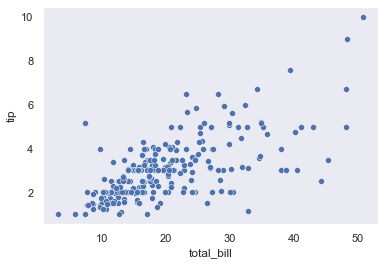

In [52]:
sns.scatterplot(data = tips, x = "total_bill", y = "tip");

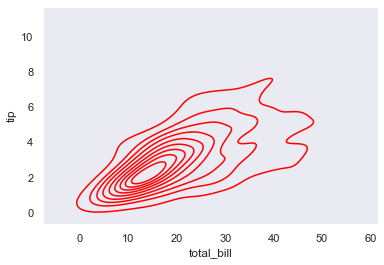

In [53]:
sns.kdeplot(data = tips, x = "total_bill", y = "tip", color = "red");

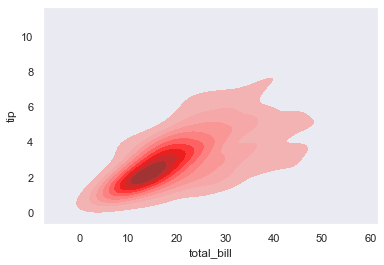

In [54]:
sns.kdeplot(data = tips, x = "total_bill", y = "tip", color = "red", shade = True);

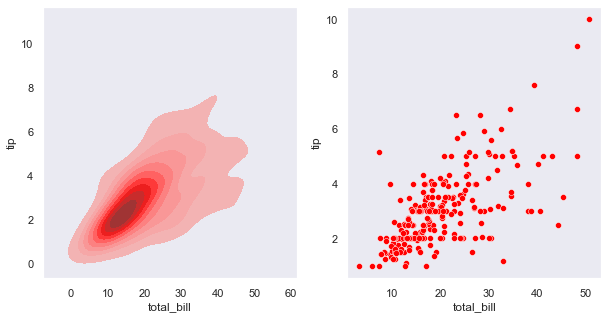

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.kdeplot(data=tips, x = "total_bill", y = "tip", color = "red", shade = True, ax = ax[0])
sns.scatterplot(data=tips, x = "total_bill", y = "tip", color = "red", ax = ax[1]);

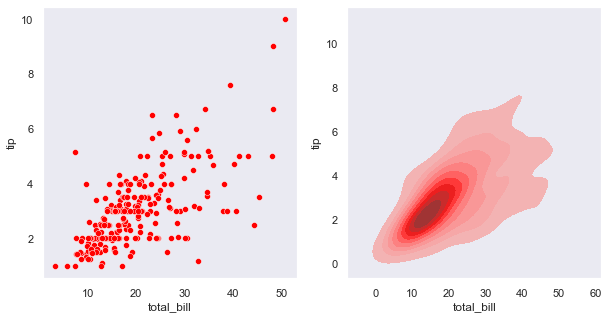

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.kdeplot(data=tips, x = "total_bill", y = "tip", color = "red", shade = True, ax = ax[1])
sns.scatterplot(data=tips, x = "total_bill", y = "tip", color = "red", ax = ax[0]);

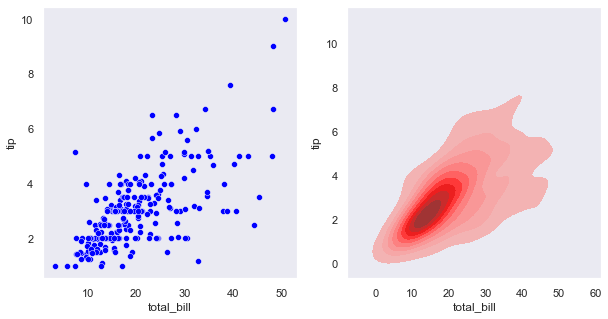

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.kdeplot(data=tips, x = "total_bill", y = "tip", color = "red", shade = True, ax = ax[1])
sns.scatterplot(data=tips, x = "total_bill", y = "tip", color = "blue", ax = ax[0]);

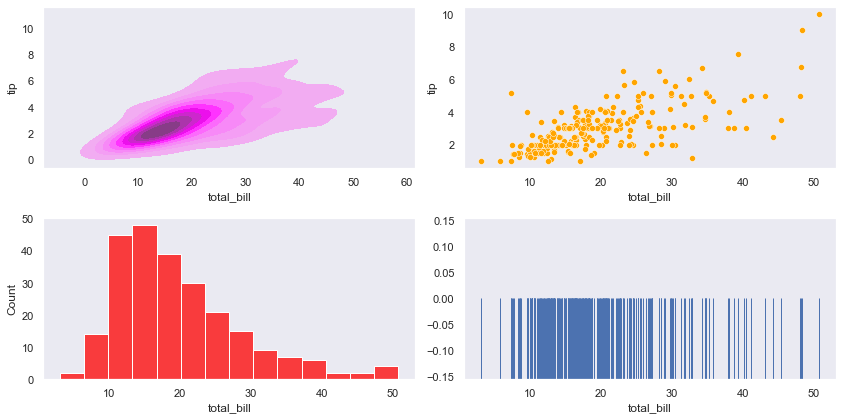

In [58]:
fig, ax = plt.subplots(2, 2, figsize = (12, 6))

sns.kdeplot(data=tips, x = "total_bill", y = "tip", color = "purple", shade = True, ax = ax[0][0])
sns.scatterplot(data=tips, x = "total_bill", y = "tip", color = "orange", ax = ax[0][1])
sns.histplot(data=tips, x = "total_bill", color = "red", ax = ax[1][0])
sns.rugplot(data=tips, x = "total_bill", height = 0.5, ax = ax[1][1])

plt.tight_layout();

## Data

Genellikle "miles per gallon" yani galon başına mil olarak ifade edilen yakıt tüketim verimliliği üzerine çeşitli analizler yapmak için kullanılır. Veri seti, 1980'lerin sonlarına kadar Amerika Birleşik Devletleri'nde üretilen çeşitli otomobillerin özelliklerini içerir.

mpg veri setinde tipik olarak şu bilgiler bulunur:

**mpg**: Araçların galon başına kat edebildiği mil (yakıt verimliliği) olarak ölçülür.

**cylinders**: Motorun silindir sayısı.

**displacement**: Motor hacmi, genellikle inç küp (ci) veya santimetre küp (cc) olarak ifade edilir.

**horsepower**: Motor gücü, beygir gücü (hp) cinsinden.

**weight**: Araç ağırlığı, pound veya kilogram cinsinden.

**acceleration**: 0'dan 60 mil/saat hıza çıkış süresi, saniye cinsinden.

**model_year**: Araç model yılı.

**origin**: Araç üretim ülkesi.

**name**: Araç model adı.

Bu veri seti, otomobillerin yakıt verimliliği ile bu özellikler arasındaki ilişkileri analiz etmek için kullanılır. Örneğin, araştırmacılar motor hacmi, ağırlık ve silindir sayısı gibi faktörlerin mpg üzerindeki etkisini inceleyebilirler.

In [59]:
cars = sns.load_dataset("mpg")

In [60]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [63]:
cars["cylinders"].nunique()

5

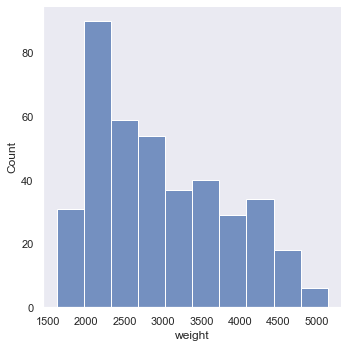

In [61]:
sns.displot(x = "weight", data = cars);

### Kod Açıklaması
Bu kod, cars veri setinin "weight" (ağırlık) sütununa göre bir histogram oluşturur. Histogram, araçların farklı "origin" (köken) değerleri için renklendirilmiştir (hue="origin").

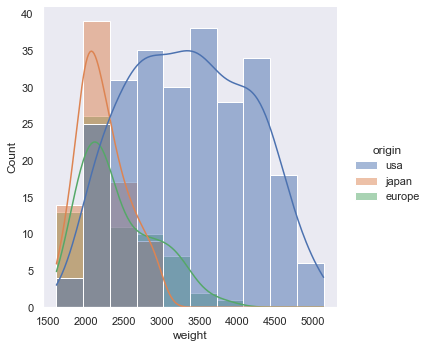

In [65]:
sns.displot(x = "weight", data = cars, hue = "origin", kde = True);

### Çıktı Açıklaması
Çıktıdaki histogram, araçların ağırlık dağılımını gösterir.

X Ekseni: Araçların ağırlığı ("weight")

Y Ekseni: Frekans (Her bir binin içerdiği gözlem sayısı)

Renkler: Farklı kökenler (örneğin, 'USA', 'Europe', 'Japan', vb. bağlı olarak origin sütunundaki değerler neyse)

Her bir renk, farklı bir kökeni temsil eder, ve bu dağılımlar üst üste bindirilmiş olarak gösterilir.

Yorumlar
Hangi ağırlık aralıklarının en yaygın olduğunu inceleyebilirsiniz.
Farklı kökenlerden gelen araçların ağırlık dağılımları arasında anlamlı farklar olup olmadığını görmek için renkli çizgileri karşılaştırabilirsiniz.
Belirli bir kökenin diğer kökenlere göre daha yaygın veya nadir olduğunu gözlemleyebilirsiniz.
Bu tür bir grafik, ağırlık dağılımı ve köken arasındaki ilişkileri anlamak için yararlı olabilir. Örneğin, Avrupalı araçların genellikle daha hafif, Amerikan araçlarının ise daha ağır olup olmadığı gibi trendleri gözlemleyebilirsiniz.

### Kod Açıklaması
Bu kod, cars adlı veri setinde cylinders sütunu 4, 6 veya 8 değerlerini alan gözlemleri seçerek bir dağılım grafiği (displot) oluşturur. Grafikler, "origin" (köken) ve "cylinders" (silindir sayısı) sütunlarına göre bir FacetGrid içerisinde düzenlenmiştir. Ayrıca, "cylinders" sütunu, farklı silindir sayılarına göre renklendirme (hue) için kullanılır.

displot fonksiyonunu kullanarak cars veri setinden silindir sayısı 4, 6 veya 8 olan araçların ağırlık (weight) dağılımını görselleştiren çoklu grafikler (facet grid) çizer. Her bir grafik, origin ve cylinders sütunlarına göre ayrılır ve silindir sayısına göre renk ayrımı yapar. İşte kodun özellikleri ve ne yaptıkları:

**data=cars[cars.cylinders.isin([4, 6, 8])]**: cars veri seti içinde sadece cylinders sütunu 4, 6 veya 8 değerlerinden birine sahip olan kayıtları filtreler ve bu filtrelenmiş veri setini displot fonksiyonuna veri olarak sağlar.

**x="weight"**: Histogramlar için x ekseninde kullanılacak olan cars veri setinin weight (ağırlık) sütununu belirtir.

**col="origin"**: origin sütunu değerlerine göre farklı sütunlar (dikey gruplama) içinde ayrı grafikler oluşturur. Yani, her bir üretim ülkesi (origin) için ayrı bir grafik çizilir.

**row="cylinders"**: cylinders sütunu değerlerine göre farklı satırlar (yatay gruplama) içinde ayrı grafikler oluşturur. Bu durumda, her bir silindir sayısı (4, 6 ve 8) için ayrı bir grafik çizilir.

**hue="cylinders"**: Grafiklerdeki çubukları veya yoğunluk tahminlerini cylinders değerlerine göre renklendirmek için kullanılır. Bu, farklı silindir sayılarına sahip araçların ağırlık dağılımını ayırt etmeyi kolaylaştırır.

**palette = "plasma"**:Grafiklerdeki çubukları veya yoğunluk tahminlerini renklerini değiştirmek için kullanılır

Sonuç olarak, bu kod bloğu çok sayıda grafikten oluşan bir ızgara (grid) oluşturur. Bu ızgara, farklı silindir sayısına sahip (4, 6 ve 8) ve farklı kökenlere (örneğin Amerika, Avrupa, Japonya) sahip araçların ağırlık dağılımlarını ayrı ayrı görselleştirir. Böylece kullanıcılar, araç kökenine ve silindir sayısına göre ağırlık dağılımındaki farklılıkları kolaylıkla gözlemleyebilirler.


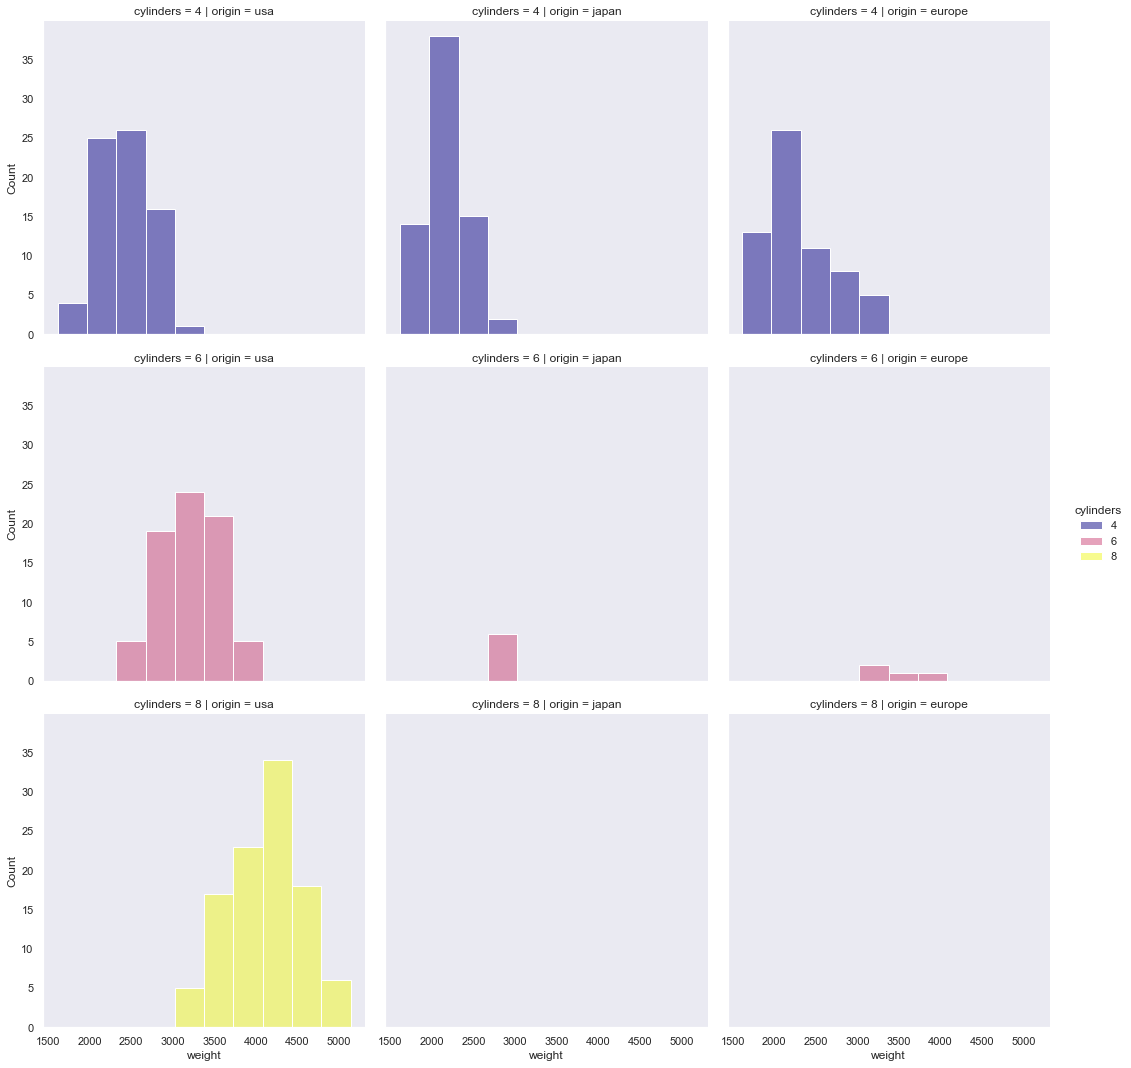

In [67]:
sns.displot(data=cars[cars.cylinders.isin([4, 6, 8])], x="weight",
           col = "origin",
           row = "cylinders",
           hue ="cylinders",
           palette = "plasma");

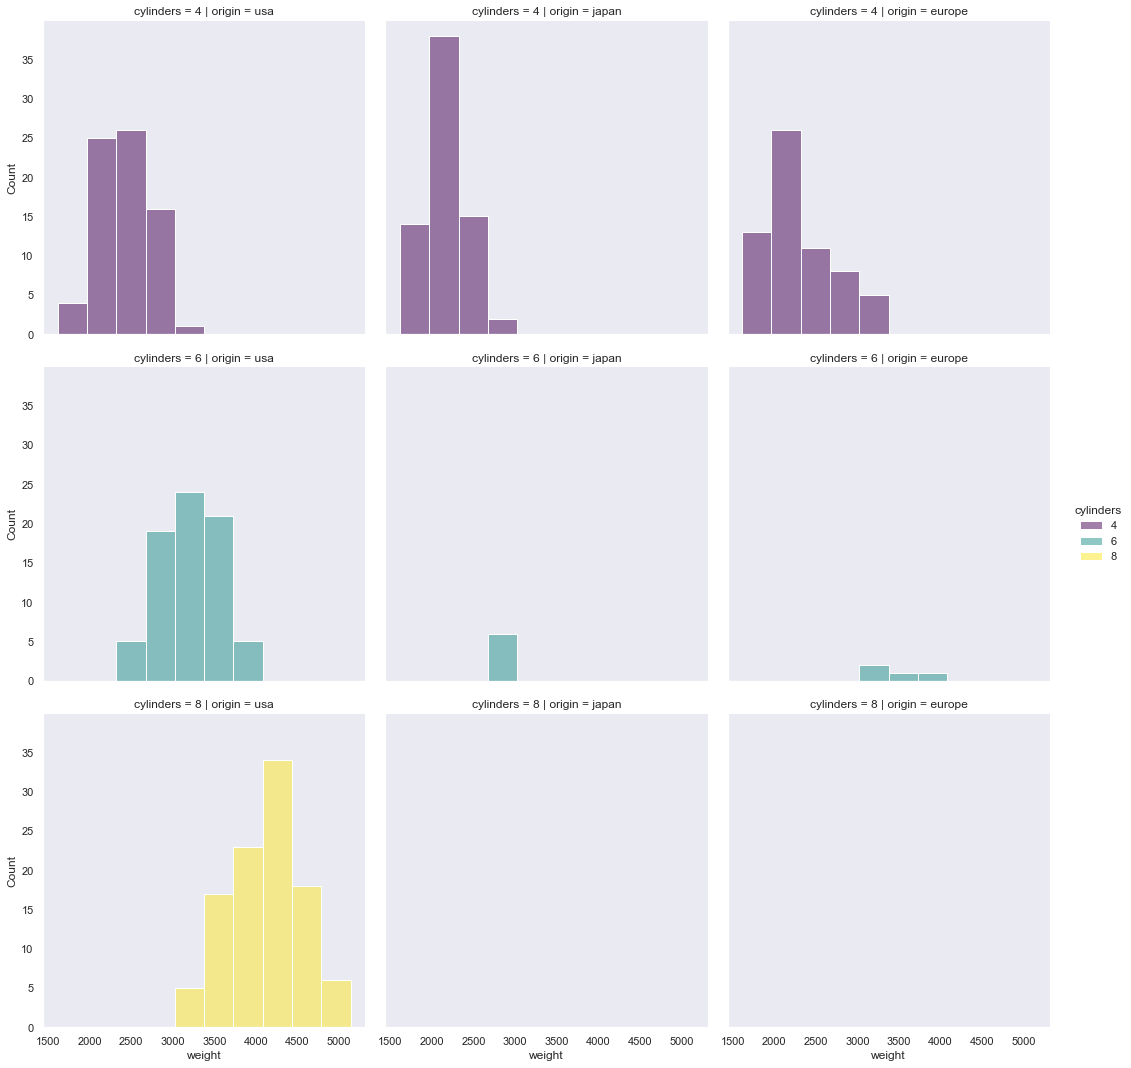

In [68]:
sns.displot(data=cars[cars.cylinders.isin([4, 6, 8])], x="weight",
           col = "origin",
           row = "cylinders",
           hue ="cylinders",
           palette = "viridis");

## Categorical Plots

### Countplot

sns.countplot fonksiyonu, kategorik bir değişkendeki her bir kategorinin frekansını yani ne kadar sık görüldüğünü gösteren bir grafik oluşturur.

alttaki kod ile:

Bu fonksiyon çalıştırıldığında, x ekseninde tips veri setindeki günler (örneğin Perşembe, Cuma, Cumartesi, Pazar) ve y ekseninde bu günlerde kaydedilen bahşiş veri noktalarının sayısını gösterir. Her gün için yüksekliği, o gün için verilen bahşiş kayıtlarının sayısına eşit olan bir çubuk görüntülenir.

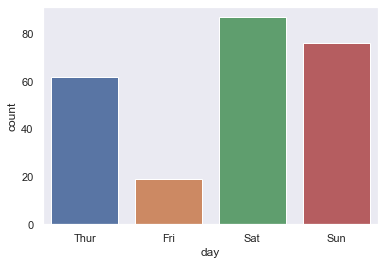

In [70]:
sns.countplot(data = tips, x = "day");

### Kod Açıklaması

Bu kod parçası, matplotlib ve seaborn kütüphanelerini kullanarak tips veri setindeki günlerin (days) frekansını gösteren bir çubuk grafiği (countplot) oluşturur ve her çubuğun üstüne o çubuğun yüksekliğini (yani o gün için veri setindeki gözlem sayısını) yazar. İşte kodun adım adım açıklaması:

fig, ax = plt.subplots(): Bu satır, bir figür (fig) ve bir eksen (ax) oluşturur. plt.subplots() fonksiyonu, matplotlib kütüphanesinin bir parçasıdır ve grafik çizimi için bir temel sağlar.

ax = sns.countplot(tips["day"]): seaborn kütüphanesinin countplot fonksiyonunu kullanarak, tips veri setindeki day sütununun değerlerinin sayısını gösteren bir çubuk grafiği çizer. Bu grafiği, daha önce oluşturulan eksen (ax) üzerine çizer. Burada tips["day"], day sütununun pandas DataFrame notasyonu ile doğrudan belirtilmiş olur.

for p in ax.patches:: ax.patches bir listeyi ifade eder ve bu liste, çubuk grafiğindeki her bir çubuğa karşılık gelir. Döngü, grafiğin her bir çubuğu (patch) için tekrar eder.

ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.5)): Her çubuk üzerinde bir metin etiketi (annotate) ekler. p.get_height() çubuğun yüksekliğini, yani o gün için bahşiş veri noktalarının sayısını alır. p.get_x() çubuğun x eksenindeki konumunu alır ve +0.3 ile biraz sağa kaydırılır, böylece etiket çubuğun ortasına yakın bir yere konumlandırılır. p.get_height() + 0.5, etiketin yüksekliğinin biraz üzerine konumlandırılmasını sağlar, böylece etiket çubuğun üstünde ve biraz yukarısında görünür.

### Çıktı Açıklaması
Çıktı bir sayım grafiği olacaktır ve her bir çubuk, tips veri setinde o gün kaç kez geçtiğini gösterir. Her bir çubuğun üzerinde, o günün kaç kez göründüğünü gösteren bir sayı olacak.

- X Ekseni: Farklı günler (Örneğin: Cuma, Cumartesi, Pazar vb.)

- Y Ekseni: Her bir gün için gözlem sayısı

Çubukların üzerinde yer alan sayılar, o gün için kaç gözlem olduğunu belirtir. Bu sayılar, grafikte her bir çubuğun tam üzerinde yer alacaktır, bu da görsel yorum için kullanışlıdır.


###  Debug

Kodu debug ediyoruz anlamaya çalışıyoruz.
xy ler Konumunu gösteriyor 
height = değerleri veriyor

p.get_height() = y düzlemindeki denk gelen yükseltideki rakamı en üste yaz

p.get_x()+0.3 = yatay düzlemde yerini belirtiyor (y ekseni)

p.get_height()+0.5 = dikey düzlemde yerini belirtiyor (y ekseni)


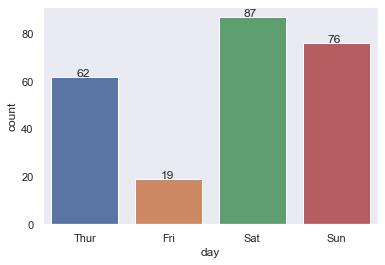

In [94]:
fig, ax = plt.subplots()

ax = sns.countplot(data = tips, x = "day")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))

In [84]:
print(ax.patches)

<Axes.ArtistList of 4 patches>


In [90]:
for p in ax.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.8, height=62, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=19, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=87, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=76, angle=0)


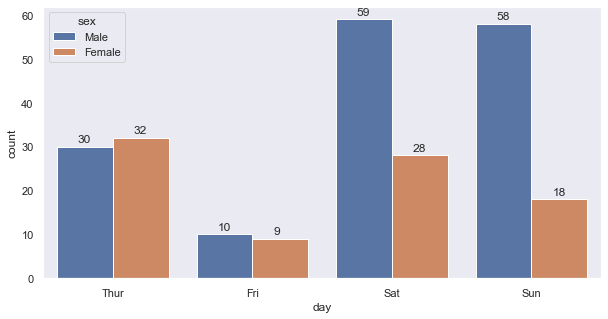

In [97]:
fig, ax = plt.subplots(figsize = (10, 5))

ax_tip = sns.countplot(data = tips, x = "day", hue = "sex")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1))

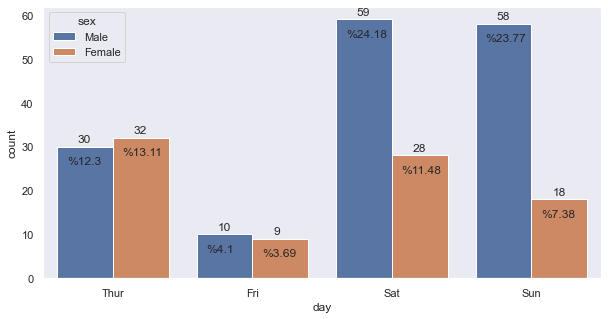

In [100]:
fig, ax = plt.subplots(figsize = (10, 5))

ax_tip = sns.countplot(data = tips, x = "day", hue = "sex")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    ax.text(p.get_x()+0.07, p.get_height()-4, "%"+str(round(p.get_height()/tips.day.count()*100, 2)));

In [101]:
mpg = sns.load_dataset("mpg")

In [102]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


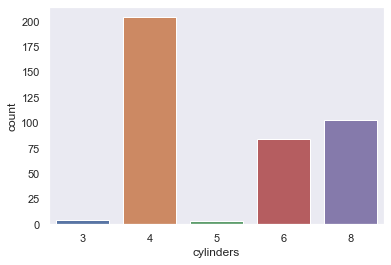

In [103]:
sns.countplot(x = "cylinders", data = mpg);

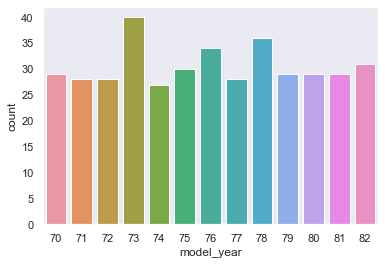

In [104]:
sns.countplot(x = "model_year", data = mpg);

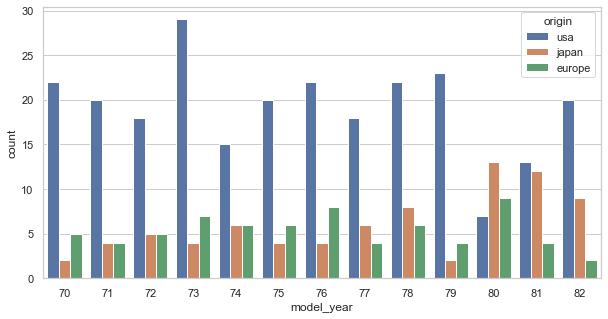

In [105]:
plt.figure(figsize = (10,5))

sns.set(style= "whitegrid")

sns.countplot(x = "model_year", hue = "origin", data = mpg);

## Barplot

### Kod Açıklaması
Bu kod örneği, tips veri seti üzerinde bir barplot (çubuk grafik) oluşturur. Grafikte, cinsiyete ("sex") göre ortalama bahşiş ("tip") miktarlarını gösterir.

- Varsayılan estimator fonksiyonu np.mean olduğundan, bu grafik her bir cinsiyet için ortalama bahşiş miktarını gösterir. Hata çubukları da konfidans aralığını (confidence interval) gösterir.

onfidance interval =ci güven aralığı ( dikey çizgiler )

Standart sapma, bir sayının bir serideki ortalama sayıdan farklılık gösteren miktarın istatistiksel ölçümüdür. Düşük standart sapma, verilerin ortalamayla çok yakından ilişkili olduğu ve dolayısıyla çok güvenilir olduğu anlamına gelir. Yüksek bir standart sapma, veriler ile istatistiksel ortalama arasında büyük bir fark olduğu ve o kadar güvenilir olmadığı anlamına gelir.

En üst değerler cinsiyete göre ortalama bahşiş durumu 

### Çıktı Açıklaması
#### Eksenler ve Genel Bakış
- X ekseni: Cinsiyet ("sex")
- Y ekseni: Ortalama bahşiş miktarı ("tip")

#### Hata Çubukları ve Yorumlama
- Her bir çubuk, belirli bir cinsiyet için ortalama bahşiş miktarını temsil eder.
- Hata çubukları (üstteki küçük çizgiler) belirli bir konfidans düzeyinde ortalama bahşiş miktarının beklenen aralığını gösterir.
- Kısa Hata Çubukları: Ortalama değer etrafında küçük bir belirsizlik olduğu anlamına gelir.
- Uzun Hata Çubukları: Ortalama değer etrafında büyük bir belirsizlik olduğu anlamına gelir.
- Bu grafik, cinsiyete göre ortalama bahşiş miktarlarını karşılaştırmak için kullanılabilir. Ayrıca, hata çubukları sayesinde, bu ortalama değerlerin ne kadar güvenilir olduğunu da değerlendirebiliriz.

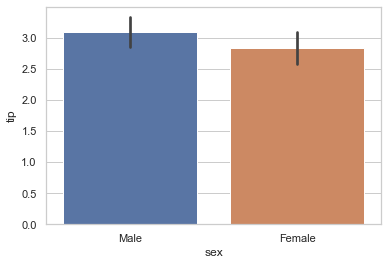

In [106]:
sns.barplot(data = tips, x = "sex", y = "tip");

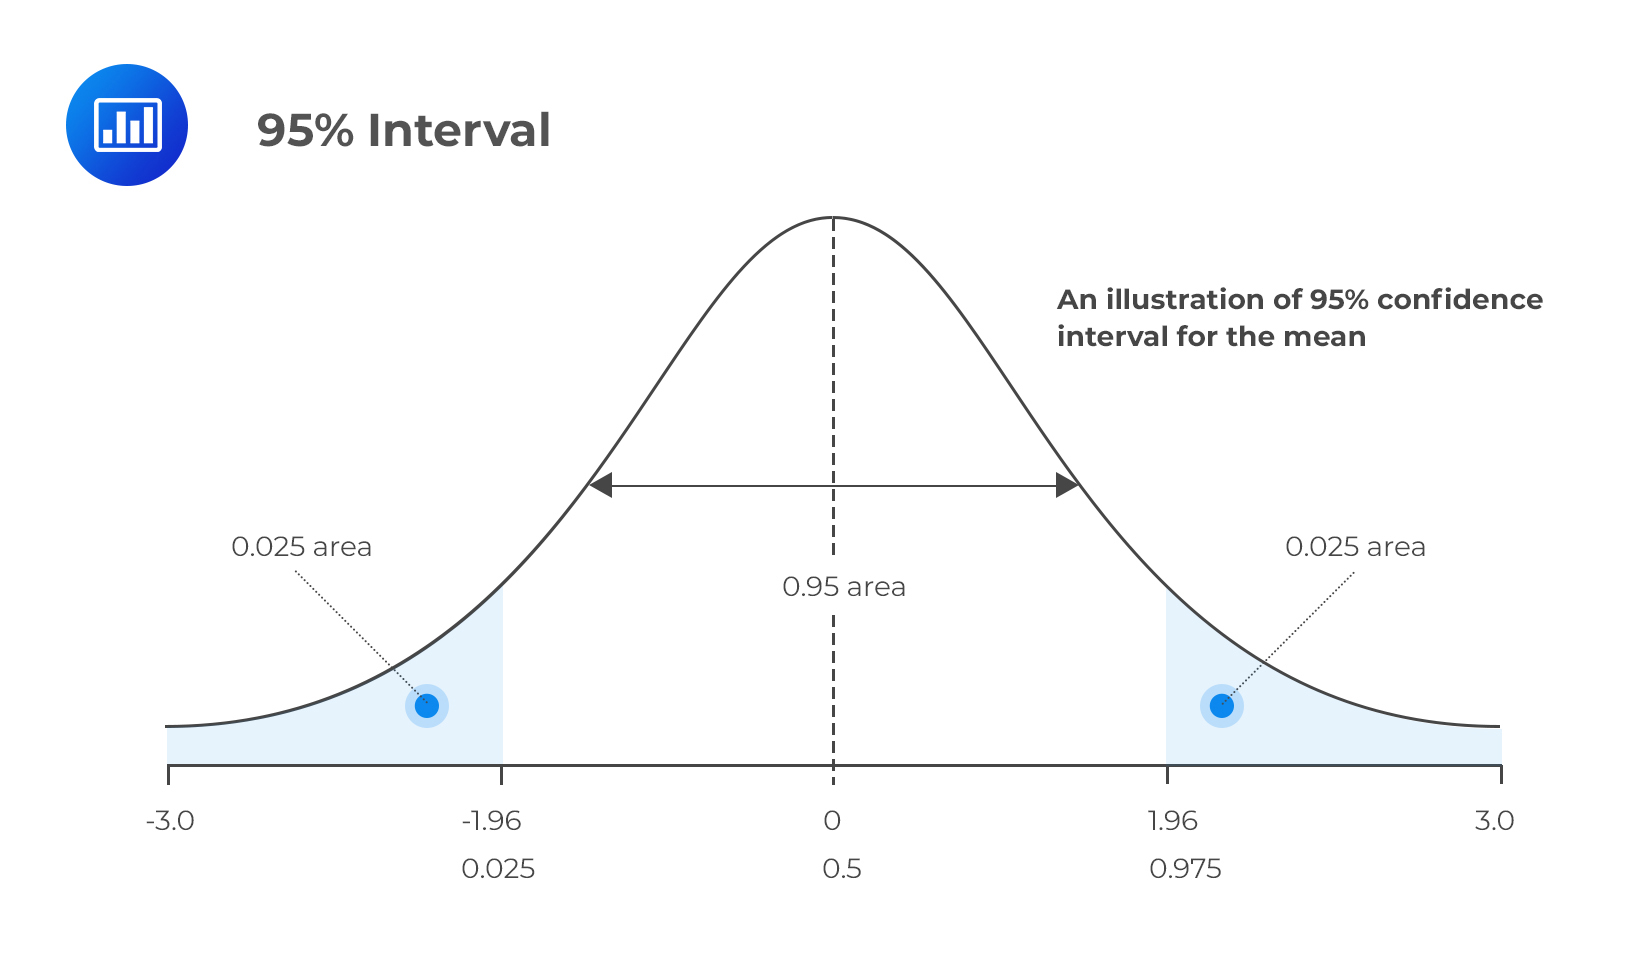

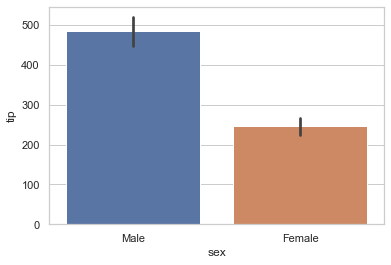

In [109]:
sns.barplot(x = "sex", y = "tip", data = tips, estimator = np.sum);

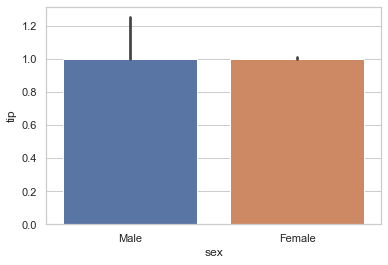

In [110]:
sns.barplot(x = "sex", y = "tip", data = tips, estimator = np.min);

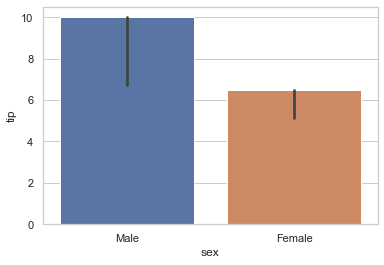

In [111]:
sns.barplot(x = "sex", y = "tip", data = tips, estimator = np.max);

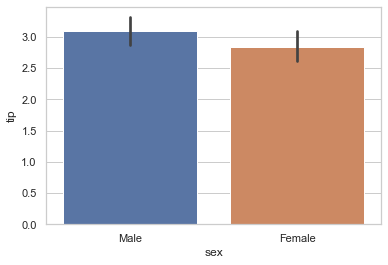

In [112]:
sns.barplot(x = "sex", y = "tip", data = tips, estimator = np.mean);

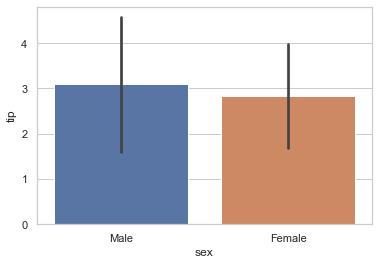

In [116]:
sns.barplot(x = "sex", y = "tip", data = tips, estimator = np.mean, ci = "sd");

In [118]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [119]:
female_tips_std = tips[tips["sex"] == "Female"]["tip"].std()
female_tips_std

1.1594945045210152

In [120]:
male_tips_std = tips[tips["sex"] == "Male"]["tip"].std()
male_tips_std

1.489101813842018

### Bar And Count Plots

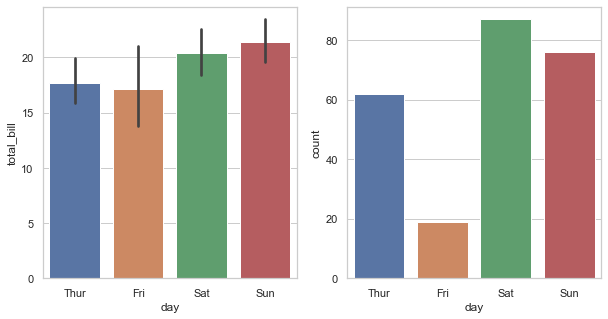

In [123]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (10, 5))

ax[0] = sns.barplot(x = "day", y = "total_bill", data = tips, ax = ax[0])
ax[1] = sns.countplot(x = "day", data = tips, ax = ax[1])

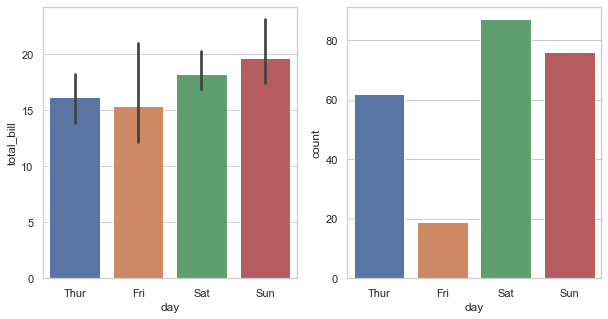

In [125]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax[0] = sns.barplot(x = "day", y = "total_bill", data = tips, ax = ax[0], estimator = np.median)
ax[1] = sns.countplot(x = "day", data = tips, ax = ax[1])

## Box plot

### Kod Açıklaması
Bu kod örneğinde, Seaborn kütüphanesini kullanarak tips veri seti üzerinde "day" (Gün) ve "tip" (Bahşiş) değişkenleri için dikey bir boxplot (kutu grafiği) oluşturuyoruz.

- x = "day", y = "tip", data = tips: X ekseni için "day" (Gün), Y ekseni için "tip" (Bahşiş) değişkenlerini ve veri seti olarak tips'i kullanıyoruz.

- Defaut 1.5 IQR değerini değişmek için **whis** parametreesi kullanılır. Örneğin, whis=2.0 olarak ayarlamak, whisker'ların Q1 - 2.0IQR ve Q3 + 2.0IQR değerlerine kadar uzanmasını sağlar,

### Çıktı Açıklaması
### Genel Bakış
Çıktıda dört dikey boxplot göreceksiniz, her biri bir günü (Pazartesi, Salı, vb.) temsil eder.

#### Eksenler
- X ekseni: Günler ("day") yer alır.
- Y ekseni: Bahşiş miktarları ("tip") yer alır.

#### Yorumlama
- Her kutu, farklı günler için bahşiş miktarlarının kuartil dağılımını gösterir.
- Kutunun alt çizgisi: İlk kuartil (Q1) değerini temsil eder.
- Kutunun üst çizgisi: Üçüncü kuartil (Q3) değerini temsil eder.
- Kutunun içindeki çizgi: Medyan değeri temsil eder.
- Whisker'lar (kutunun üstünden ve altından çıkan çizgiler), değerlerin ne kadar yayıldığını gösterir.
- Outlier'lar (aykırı değerler), kutunun dışında tekil noktalar olarak gösterilir. Özellikle Cumartesi günü için gözlemlenen aykırı değerler var.
- Cumartesi günü için gözlemlenen outlier'lar, bu günde özellikle yüksek veya düşük bahşişlerin verildiği anlamına gelebilir. Bu tür outlier'lar genellikle daha derin bir analiz gerektirir.

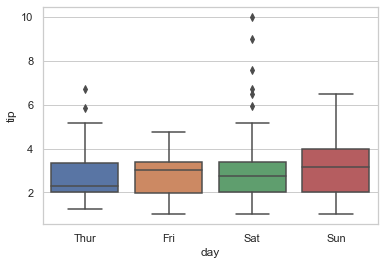

In [126]:
sns.boxplot(x = "day", y ="tip", data = tips);

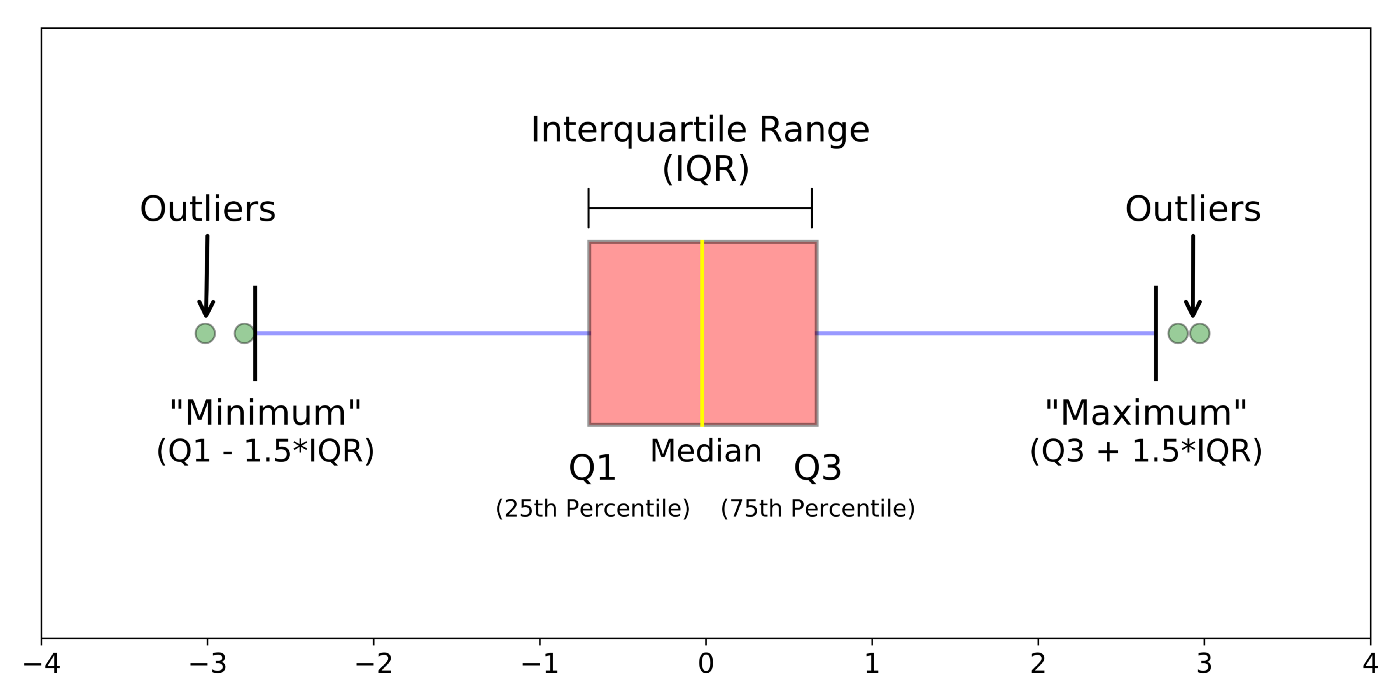

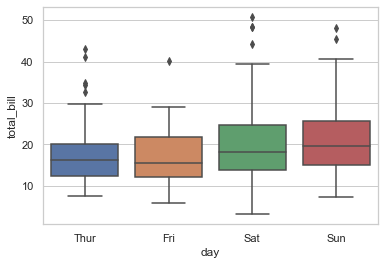

In [127]:
sns.boxplot(x = "day", y ="total_bill", data = tips);

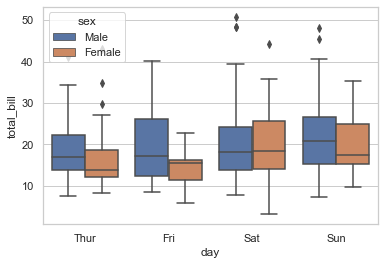

In [128]:
sns.boxplot(x = "day", y ="total_bill", data = tips, hue = "sex");

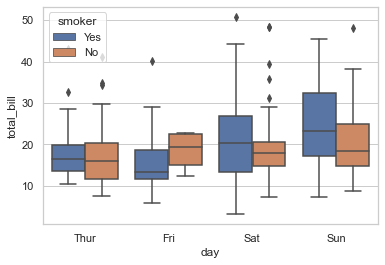

In [129]:
sns.boxplot(x = "day", y ="total_bill", data = tips, hue = "smoker");

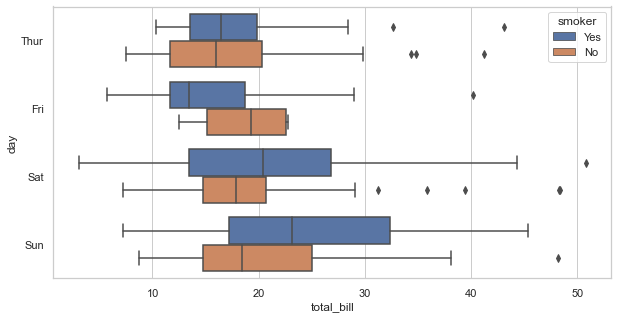

In [131]:
plt.figure(figsize=(10, 5))
sns.boxplot(y = "day", x ="total_bill", data = tips, hue = "smoker");

## Violin Plot

### Kod Açıklaması
Bu kod örneğinde, Matplotlib ve Seaborn kütüphaneleri kullanılarak tips veri seti için yatay bir violinplot (keman grafiği) oluşturuluyor.

Violin plotlar, veri dağılımının yoğunluğunu ve olasılık yoğunluğunu göstermek için kullanılan gelişmiş bir boxplot türüdür. Hem boxplotun sunduğu bilgileri (medyan, çeyrekler) hem de kernel yoğunluk tahminini (veri yoğunluğunun yumuşatılmış histogramı) bir arada sunar.

Merkez Çubuk: Violin plotun içinde genellikle beyaz nokta ile gösterilen medyan (veri setinin orta noktası) bulunur. Bu çubukların uzunluğu genellikle çeyrekler arası aralığı (IQR) temsil eder; yani veri setinin ortadaki %50'lik kısmını gösterir.

Violin Genişliği: Violin'in en geniş olduğu yer, veri noktalarının en yoğun olduğu bölgeyi gösterir. Yani, bir violin plotun şekli, o değerin veri setinde ne kadar sık olduğunu gösterir; violin genişledikçe, o değere sahip gözlemler o kadar sık rastlanmış demektir.

Uç Noktalar: Violin plotun en üst ve en alt uçları genellikle veri setindeki maksimum ve minimum değerleri gösterir (ancak bazı durumlarda extrem değerler veya aykırı değerler hariç tutulabilir).

- plt.figure(figsize = (12, 6)): Grafiğin boyutları 12x6 olarak belirlenir.
- x = "day", y = "tip", data = tips: x ekseni için "day" (Gün), y ekseni için "tip" (Bahşiş) ve veri seti olarak tips seçilir.

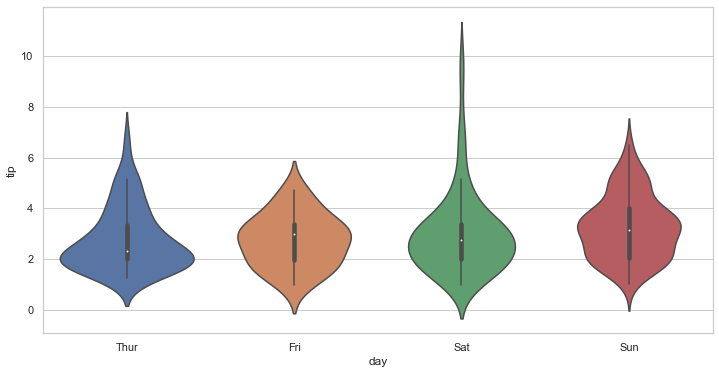

In [134]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = "day", y ="tip", data = tips);

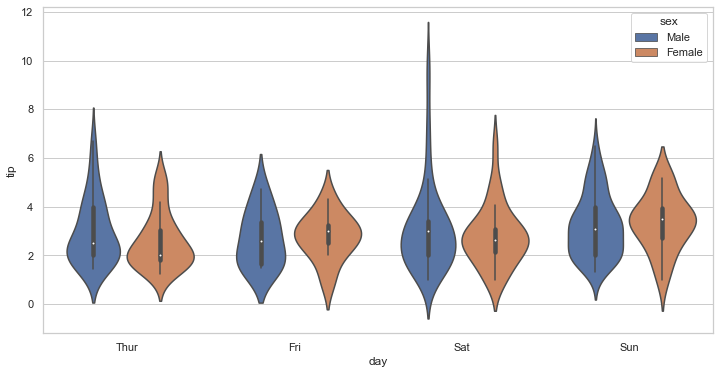

In [135]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = "day", y ="tip", data = tips, hue = "sex");

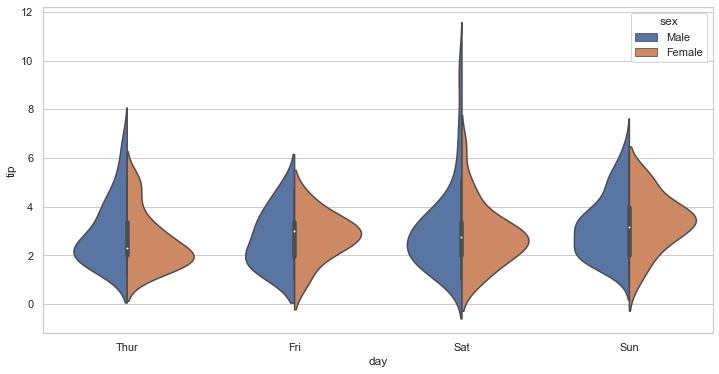

In [136]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = "day", y ="tip", data = tips, split = True, hue = "sex");

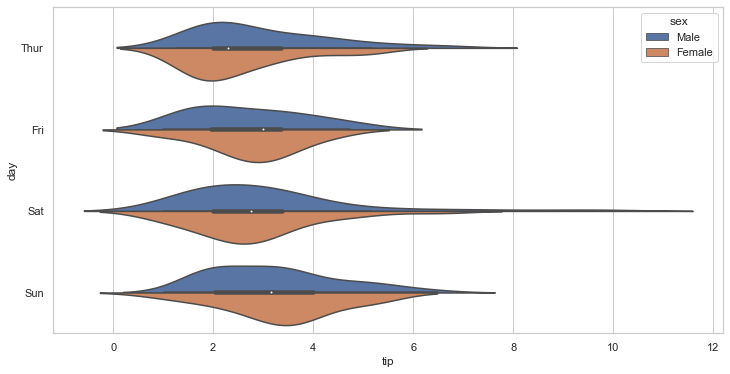

In [137]:
plt.figure(figsize=(12, 6))
sns.violinplot(y = "day", x ="tip", data = tips, split = True, hue = "sex");

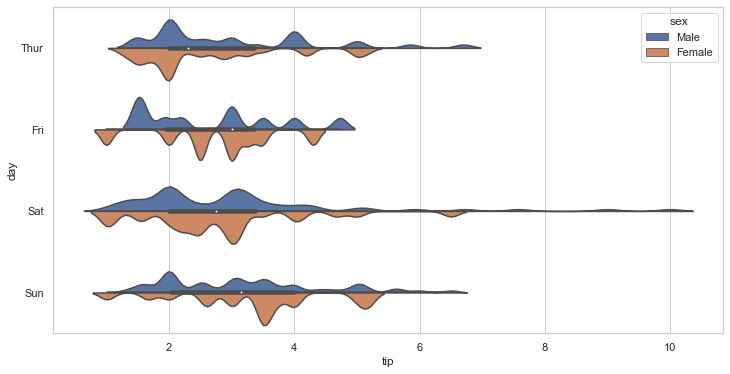

In [138]:
plt.figure(figsize=(12, 6))
sns.violinplot(y = "day", x ="tip", data = tips, split = True, hue = "sex", bw=0.1);

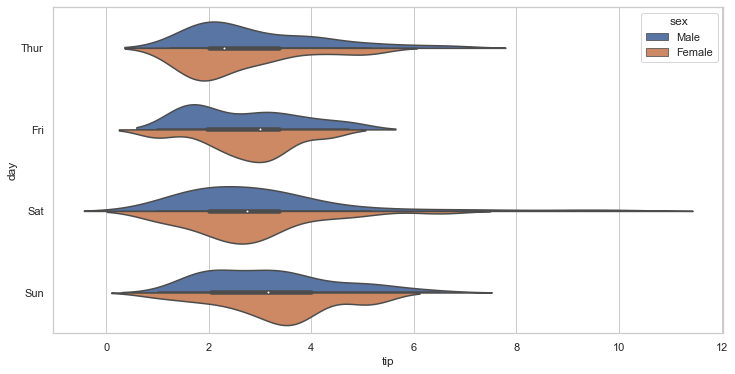

In [140]:
plt.figure(figsize=(12, 6))
sns.violinplot(y = "day", x ="tip", data = tips, split = True, hue = "sex", bw=0.4);

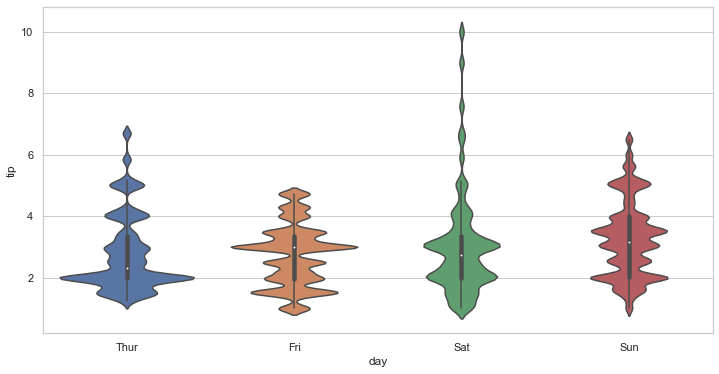

In [142]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = "day", y ="tip", data = tips, bw = 0.1);

## Swarm Plot

Swarm plot, veri noktalarının bireysel olarak gösterildiği ve üst üste binmeden yanyana yerleştirildiği bir çizim türüdür. 

Genellikle kategorik veri dağılımlarının detaylı bir görselleştirmesi için kullanılır. Bu tür bir plot, kategorik eksen boyunca veri yoğunluğunun ve dağılımının yanı sıra bireysel veri noktalarını da gösterir.

Swarm plot okunurken dikkat edilmesi gereken noktalar:

Veri Yoğunluğu: Plot üzerinde veri noktalarının sıkışık olduğu bölgeler, veri yoğunluğunun yüksek olduğu alanları gösterir.
Veri Dağılımı: Veri noktalarının yayılımı, kategorik değişkenin değerleri arasında gözlemlerin nasıl dağıldığını gösterir.
Aykırı Değerler: Swarm plotlarda aykırı değerler kolaylıkla görülebilir, çünkü her veri noktası açıkça belirtilir ve üst üste binmezler.
Merkezi Eğilim: Her ne kadar swarm plotlar merkezi eğilim ölçülerini doğrudan göstermese de, veri noktalarının yoğunlaştığı bölge merkezi eğilim hakkında fikir verebilir.
Swarm plotların kullanımı özellikle veri setindeki her bir gözlemin görselleştirilmesini istediğinizde tercih edilir. Ancak, büyük veri setleri için uygun olmayabilirler, çünkü çok sayıda nokta olduğunda plotlar okunaksız hale gelebilir veya çizim çok uzun sürebilir. Bu durumda, boxplot veya violin plot gibi daha özet görselleştirmeler tercih edilir.

Swarm plot genellikle boxplot veya violin plot ile birlikte kullanılır, böylece verinin yayılımı ve yoğunluğu hakkında daha fazla bilgi edinilebilir. Swarm plotun her bir noktası bir gözlemi temsil ettiği için, aynı kategorik değerlere sahip veri noktalarının çakışmaması için yatay eksende bir miktar ayarlama yapılır. Bu, özellikle birden fazla gözlem aynı değere sahip olduğunda faydalıdır, çünkü bu noktaların hepsi görselleştirilebilir ve böylece hangi değerlerin daha yaygın olduğu net bir şekilde görülebilir.

### Kod Açıklaması
Bu kod örneğinde, Matplotlib ve Seaborn kütüphaneleri ile tips veri setinden bir swarmplot (yığın grafik) oluşturuluyor.

- plt.figure(figsize = (10, 5)): Grafiğin boyutları 10x5 olarak belirleniyor.
- y = "total_bill", data = tips: y ekseni için "total_bill" (Toplam Hesap) ve veri seti olarak tips seçiliyor.
- size = 10: Her bir veri noktasının boyutu 10 olarak belirleniyor.
- x = "smoker", hue = "sex": x ekseni için "smoker" (Sigara İçen) ve renk tonu (hue) için "sex" (Cinsiyet) değişkenleri seçiliyor.

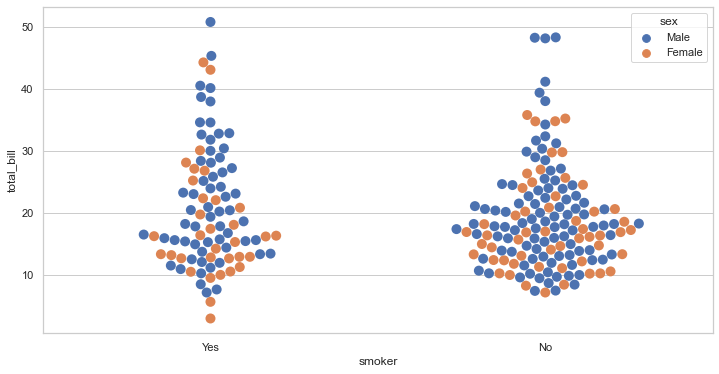

In [145]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x = "smoker", y ="total_bill", data = tips, hue="sex", size = 10);

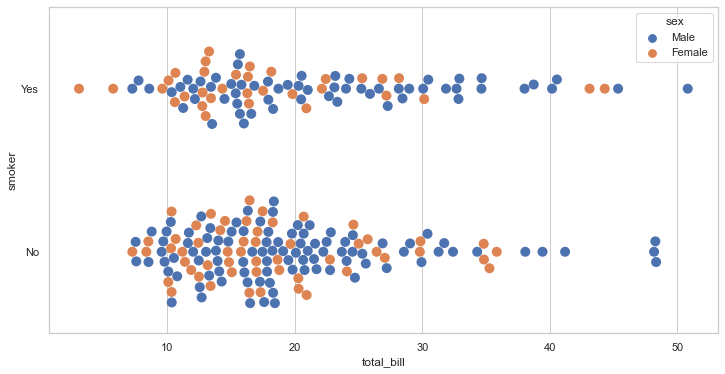

In [146]:
plt.figure(figsize=(12, 6))
sns.swarmplot(y = "smoker", x ="total_bill", data = tips, hue="sex", size = 10);

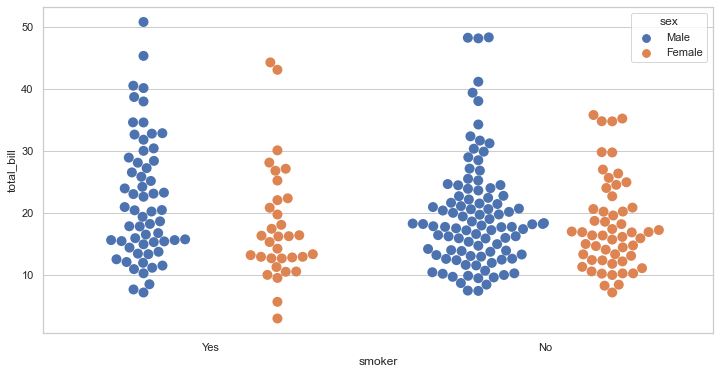

In [147]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x = "smoker", y ="total_bill", data = tips, hue="sex", size = 10, dodge = True);

## Comparison Plot

### Joint Plot

İçiçe plotlar çizer. iki farklı grafiği aynı anda görmeyi sağlar. 

jointplot, Seaborn kütüphanesinde iki değişkenin birlikte dağılımını görselleştirmek için kullanılan bir fonksiyondur. Bu çizim, iki değişken arasındaki ilişkiyi hem scatter plot (saçılım grafiği) veya hexbin plot gibi iki boyutlu grafik formatında hem de her bir değişken için ayrı ayrı histogramlar veya KDE (Kernel Density Estimate) plotlar gibi tek boyutlu dağılım grafikleri ile birleştirir. Bu sayede kullanıcılar, iki değişken arasındaki ilişkiyi ve her bir değişkenin kendi başına dağılımını aynı anda inceleyebilirler.

jointplot özellikle şu durumlarda kullanışlıdır:


İki sürekli değişken arasındaki ilişkinin hem dağılımını hem de yoğunluğunu görmek istediğinizde.
İki değişken arasındaki korelasyonu görselleştirmek istediğinizde.
Aykırı değerleri veya veri setindeki diğer özellikleri keşfetmek istediğinizde.

Bir jointplot okunurken:


Merkezdeki saçılım grafiği (scatter plot), iki sürekli değişken arasındaki ilişkiyi noktalarla gösterir. Bu noktaların yoğunlaştığı yerler, iki değişken arasında sık rastlanan kombinasyonları gösterir.

X ve y eksenlerinde yer alan marjinal plotlar (üstte ve sağda genellikle histogramlar veya KDE plotlar), her bir değişkenin tek boyutlu dağılımını gösterir.
Eğer çizimde bir korelasyon katsayısı veya regresyon çizgisi de varsa, bu iki değişken arasındaki ilişkinin gücü ve yönü hakkında bilgi verir.

Örneğin, total_bill ve tip değişkenleri için bir jointplot çizildiğinde, müşterilerin ne kadar hesap ödediklerine göre ne kadar bahşiş bıraktıklarını görebilirsiniz. Saçılım grafiği, yüksek hesaplar için genellikle daha yüksek bahşişler verildiğini gösterebilir ve histogramlar, bahşiş ve hesap miktarlarının genel dağılımını gösterir. Bu tür görselleştirmeler, veri hakkında derinlemesine bilgi sahibi olmayı sağlar.

## Kod Açıklaması
Bu kod örneğinde, Seaborn'un jointplot fonksiyonu kullanılarak tips veri setinde "total_bill" (toplam hesap) ve "tip" (bahşiş) değişkenleri arasındaki ilişki gösterilmektedir.

data = tips: Veri seti olarak tips kullanılır.
x = "total_bill", y = "tip": x ekseni için "total_bill" ve y eksen için "tip" değişkenleri seçilir.
kind = "scatter": Grafik türü olarak saçılım (scatter) grafiği seçilir.
alpha = 0.7: Veri noktalarının saydamlığı 0.7 olarak ayarlanır. Bu, veri noktalarının üst üste geldiği alanlarda yoğunluğu gözlemlemek için yararlıdır.

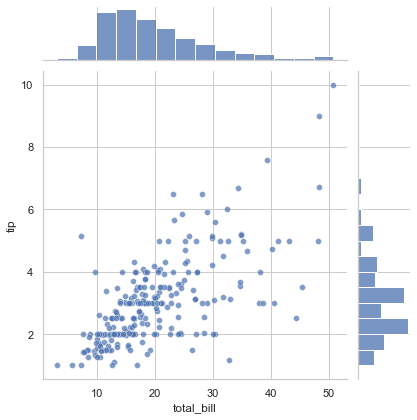

In [149]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "scatter", alpha = 0.7);

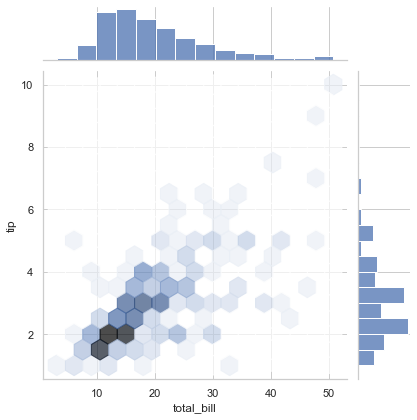

In [150]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex", alpha = 0.7);

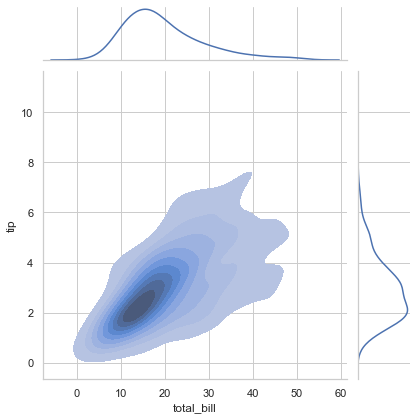

In [152]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde", shade = True);

## Pair Plot
Datanın içindeki kategorik olsa bile numerik(float, int)  verilerin tüm grafiğiklerini verir. data içinde hızlı bir göz atmak için kullanılmaktadır. Tek değişkenli ve çok teğişkenli veri setlerini tanımanıza fayda sağlar.

avantajı içine sadece datayı veriyorum. o kendi kendine ilişkileri kuruyor. dikkat edin x ve y vermiyorum.

matplotlib'den güçlü yönü renkleri kullanabilmek.

renkler için link = https://seaborn.pydata.org/tutorial/color_palettes.html

corner = True denildiğinde ayna yansımasıunı almıyor

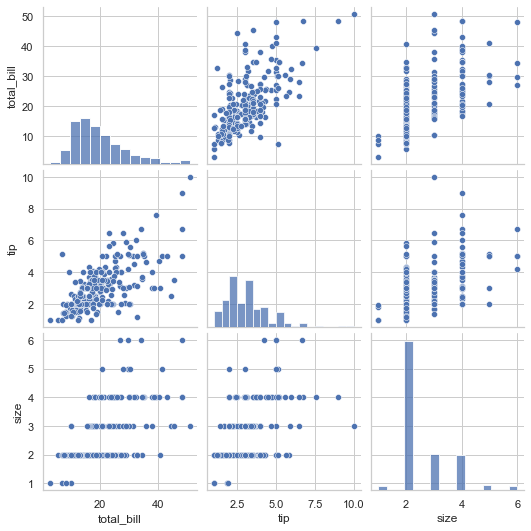

In [153]:
sns.pairplot(tips);

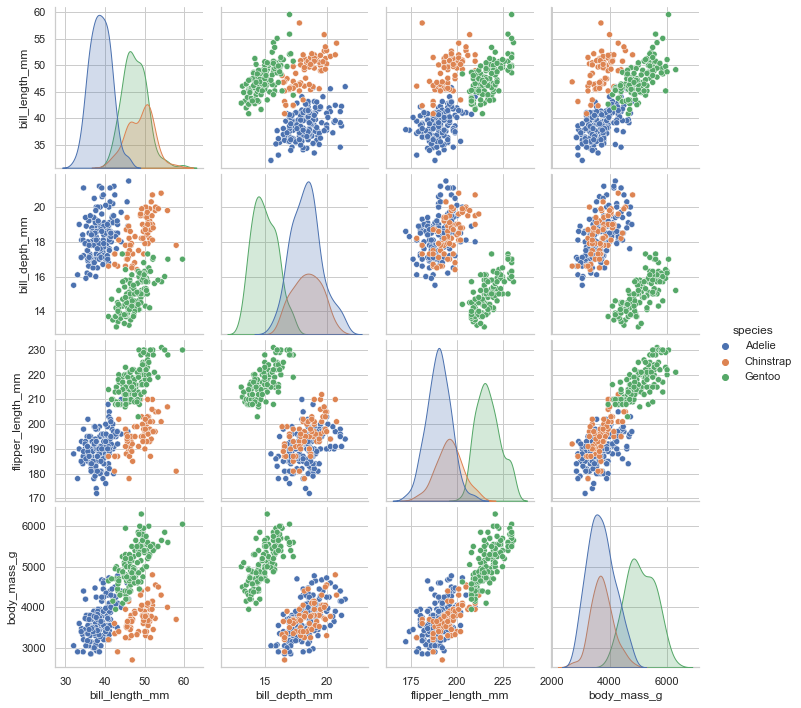

In [155]:
sns.pairplot(penguins, hue="species");

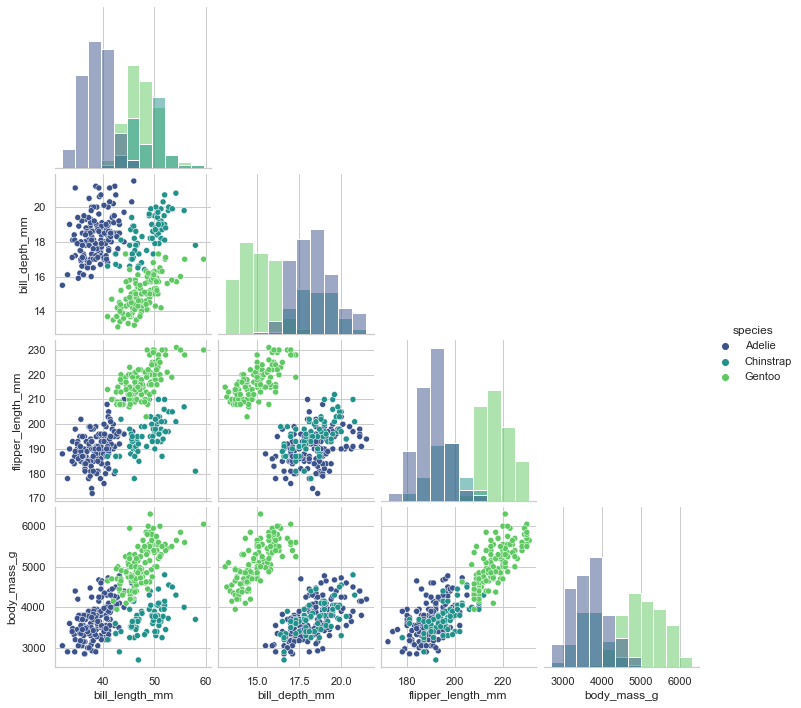

In [157]:
sns.pairplot(penguins, hue="species", palette = "viridis", diag_kind = "hist", corner=True);

### Pair Grid

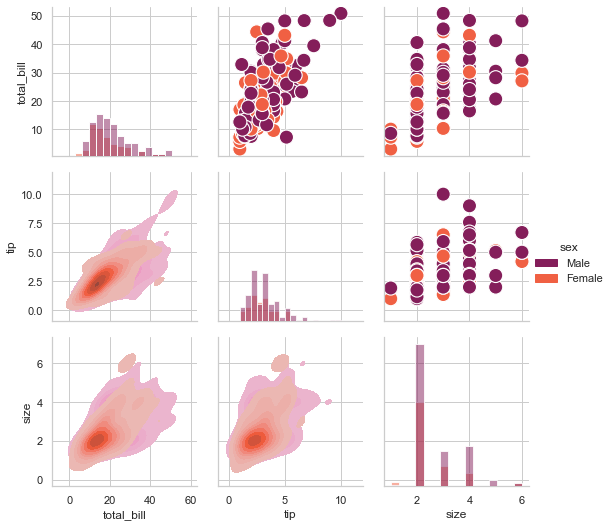

In [162]:
g = sns.PairGrid(tips, hue = "sex", palette = "rocket")

g = g.map_upper(sns.scatterplot, s = 200)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot, shade = True, color = "g")

g = g.add_legend();

### Facet Grid

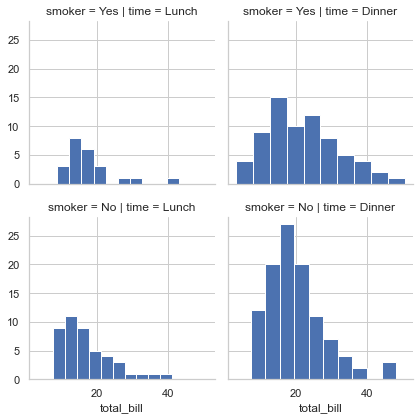

In [163]:
g = sns.FacetGrid(data = tips, col = "time", row = "smoker")
g = g.map(plt.hist, "total_bill");

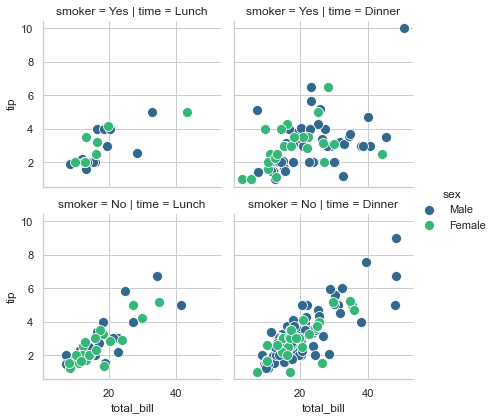

In [166]:
g = sns.FacetGrid(data = tips, col = "time", row = "smoker", hue = "sex", palette = "viridis")
g = g.map(sns.scatterplot, "total_bill", "tip", s = 100)

g = g.add_legend();

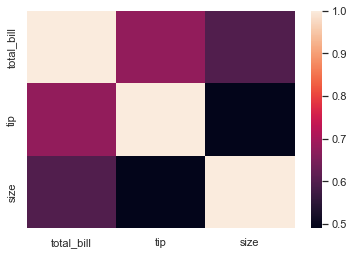

In [169]:
sns.heatmap(tips.corr());

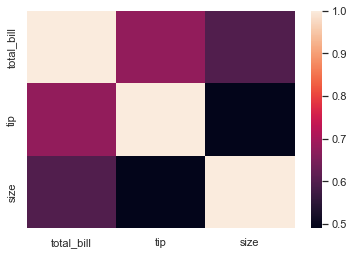

In [167]:
numeric_tips = tips.select_dtypes(include=[np.number])
corelation_matrix = numeric_tips.corr()

sns.heatmap(corelation_matrix);

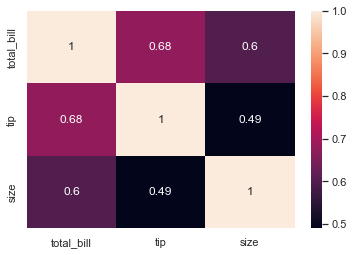

In [170]:
sns.heatmap(corelation_matrix, annot=True);

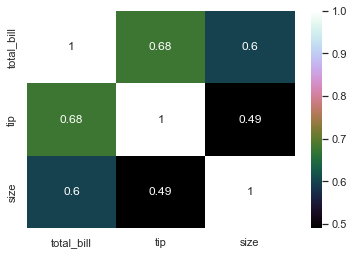

In [172]:
sns.heatmap(corelation_matrix, annot=True, cmap = "cubehelix");

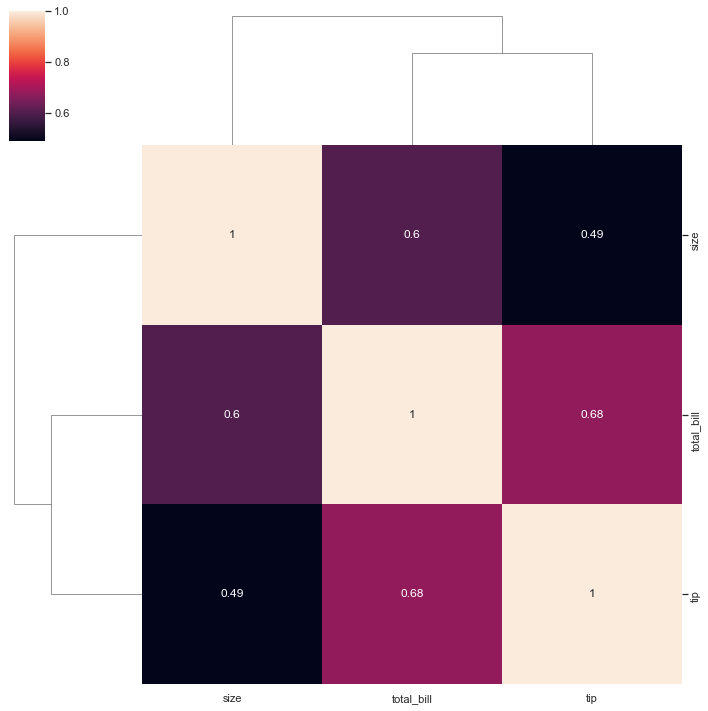

In [173]:
sns.clustermap(corelation_matrix, annot = True);